## Web Scrapping

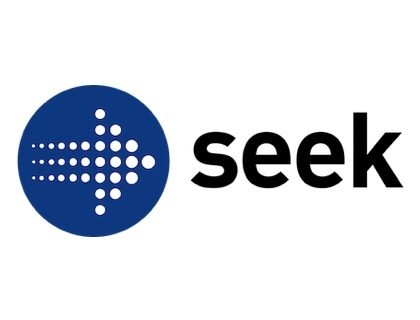

In [177]:
from IPython.display import Image
Image(filename='seeklogo.jpg')

## Table of content
- [1 Investigate Data](#1InvestigateData)
    - [1.1 look at outlier](#1.1lookatoutlier)
    - [1.2 EDA](#1.2EDA)
- [2 Stemmer and Vectorization](#StemmerandVectorization)
- [3 Work with jobtitle](#Workwithjobtitle)
- [4 Work with job decription](#Workwithjobdecription)
- [5 Work with state](#Workwithstate)
- [6 Work with skills](#Workwithskills)
- [7 Work with job Classification](#WorkwithjobClassification)

- [Q1 Salary classification](#Q1Salaryclassification)
    - [Q1.1CrossValidationwithdifferentmodels](#Q1.1CrossValidationwithdifferentmodels)
    - [Q 1.2 Voting classifier](#Q1.2Votingclassifier)
    - [Q 1.3 Lasso and ridge](#Q1.3Lassoandridge)
    - [Q 1.4 Compare models](#Q1.4Comparemodeler)
    - [Q 1.5 Best models](#Q1.5Bestmodeler)
    - [Random Forest](#RandomForest)
    - [select kbest](#selectkbest)
    
- [Q2 Identify job base description](#Q2Identifyjobbardescription)
    - [Q2.1CrossValidationwithdifferentmodels](#Q1.1CrossValidationwithdifferentmodels)
    - [Q 2.2 Voting classifier](#Q2.2Votingclassifier)
    - [Q 2.3 Lasso and ridge](#Q2.3Lassoandridge)
    - [Q 2.4 Compare models](#Q2.4Comparemodeler)
    - [Q 2.5 Best models](#Q2.5Bestmodeler)
    - [logistic regression](#logisticregression)
    - [result per job title](#resultperjobtitle)
    
- [Q3 Prediction skills and state](#Q3Predictionskillsandstate)
    - [Q3.1CrossValidationwithdifferentmodels](#Q1.1CrossValidationwithdifferentmodels)
    - [Q 3.2 Voting classifier](#Q3.2Votingclassifier)
    - [Q 3.3 Lasso and ridge](#Q3.3Lassoandridge)
    - [Q 3.4 Compare models](#Q3.4Comparemodeler)
    - [Q 3.5 Best models](#Q3.5Bestmodeler)
    - [GridSearchCV BaggingClassifier](#GridSearchCVBaggingClassifier)
    
- [Q4 Identify job title](#Q4Identifyjobtitle)
    - [Q 4.1CrossValidationwithdifferentmodels](#Q4.1CrossValidationwithdifferentmodels)
    - [Q 4.2 Voting classifier](#Q4.2Votingclassifier)
    - [Q 4.3 Lasso and ridge](#Q4.3Lassoandridge)
    - [Q 4.4 Compare models](#Q4.4Comparemodeler)
    - [Q 4.5 Best models](#Q4.5Bestmodeler)

    

In [178]:
# plotting modules
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#import pandas_profiling
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.linear_model import SGDRegressor, SGDClassifier,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
#import graphlab
#import turicreate
#from surprise import SVD
#from surprise import Dataset
#from surprise.model_selection import cross_validate
#import Recommenders as Recommenders
import lifetimes
import xgboost
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict


In [179]:
#https://github.com/rowandl/portfolio/blob/master/Webscraping%20Indeed.com/Webscraping%20Indeed.ipynb
#https://github.com/aakashtandel/Web-Scraping-Indeed/blob/master/Code/Project%203%20-%20Web%20Scraping%20Indeed%20Job%20Listings%20Jupyter%20Notebook.ipynb
#https://github.com/justmarkham/pycon-2016-tutorial/blob/master/tutorial_with_output.ipynb

In [180]:
all_scrap = pd.read_csv('data jobs.csv', index_col=False,encoding="utf-8")

#choose column
choosen_column =all_scrap[['title', 'company','date_posted','description','job_category_1','job_category_2','job_type', 'salary_range', 'location_2', 'location_1']]
choosen_column.columns = ['job_title', 'company', 'date_posted','description', 'sub_category1', 'sub_category2', 'job_type', 'salary_range', 'suburb', 'region']

In [181]:
all_scrap.head(2)

,Unnamed: 0,Unnamed: 0.1,company,date_posted,description,job_category_1,job_category_2,job_type,location_1,location_2,salary,salary_range,title
0,0,0,NaN,23-Oct-18,About us At Modus Projects we provide pr...,Administration & Office Support,Data Entry & Word Processing,Full Time,Sydney,Southern Suburbs & Sutherland Shire,NaN,0-50k,Administration Assistant / Data Entry
1,1,1,Haymans Electrical & Data Suppliers,08-Oct-18,Warehouse &amp; Storage Traineeship Hay...,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Full Time,Western QLD,NaN,NaN,0-50k,Stores Person


<a id='1InvestigateData'></a>
## 1 Investigate Data

In [182]:
choosen_column.head(2)

,job_title,company,date_posted,description,sub_category1,sub_category2,job_type,salary_range,suburb,region
0,Administration Assistant / Data Entry,NaN,23-Oct-18,About us At Modus Projects we provide pr...,Administration & Office Support,Data Entry & Word Processing,Full Time,0-50k,Southern Suburbs & Sutherland Shire,Sydney
1,Stores Person,Haymans Electrical & Data Suppliers,08-Oct-18,Warehouse &amp; Storage Traineeship Hay...,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Full Time,0-50k,NaN,Western QLD


In [183]:
#looking duplicate
print('check description duplicate data', choosen_column.description.duplicated().sum())
print('check job_title duplicate data', choosen_column.job_title.duplicated().sum())
print('choosen_column', choosen_column.shape)

('check description duplicate data', 8183)
('check job_title duplicate data', 11510)
('choosen_column', (22014, 10))


In [184]:
#all_scrap.drop_duplicates(inplace=True) #dropping duplicates
#data= choosen_column.drop_duplicates(keep='first')
data=choosen_column.copy()
data.shape

(22014, 10)

In [185]:
def unique_counts(data):
    for i in data.columns:
        count = data[i].nunique()
        print(i, ": ", count)
unique_counts(data)

('job_title', ': ', 10503)
('company', ': ', 3639)
('date_posted', ': ', 49)
('description', ': ', 13830)
('sub_category1', ': ', 29)
('sub_category2', ': ', 308)
('job_type', ': ', 3)
('salary_range', ': ', 7)
('suburb', ': ', 19)
('region', ': ', 66)


In [186]:
data.isnull().sum()

job_title         114
company          7118
date_posted       114
description       114
sub_category1     114
sub_category2     114
job_type          114
salary_range        0
suburb           6501
region            114
dtype: int64

In [187]:
clean_data=data.dropna(axis=0, subset=['job_title']) #remove row where if there is any 'NaN
#all_scrap.drop_duplicates(inplace=True) 
clean_data.shape

(21900, 10)

In [188]:
clean_data.describe().T
#choosen_column.info()

,count,unique,top,freq
job_title,21900,10503,Business Analyst,160
company,14896,3639,Hudson,250
date_posted,21900,49,26-Oct-18,1384
description,21900,13830,The Organisation \r\r\n Airservices is a g...,36
sub_category1,21900,29,Information & Communication Technology,6297
sub_category2,21900,308,Administrative Assistants,1583
job_type,21900,3,Full Time,15195
salary_range,21900,7,100k-120k,4027
suburb,15513,19,"CBD, Inner West & Eastern Suburbs",4725
region,21900,66,Sydney,8566


In [189]:
#spliting salary
clean_data.salary_range.replace(regex=True,inplace=True,to_replace="k",value="")
clean_data['salary_split'] = clean_data['salary_range'].str.split('-')
def avg(clean_data):
    clean_data['lower'] = clean_data['salary_split'].str[0].astype('float')
    clean_data['upper'] = clean_data['salary_split'].str[1].astype('float')
    clean_data['avg'] = clean_data[['lower','upper']].mean(axis=1)
avg(clean_data)

#dropping column 
job_data=clean_data.drop(['salary_split','salary_range','lower','avg'], axis=1)

#divide low and medium salary
job_data['salary_classification'] = (job_data["upper"] >= job_data["upper"].median()).astype(float)
job_data.head(2)

,job_title,company,date_posted,description,sub_category1,sub_category2,job_type,suburb,region,upper,salary_classification
0,Administration Assistant / Data Entry,NaN,23-Oct-18,About us At Modus Projects we provide pr...,Administration & Office Support,Data Entry & Word Processing,Full Time,Southern Suburbs & Sutherland Shire,Sydney,50.0,0.0
1,Stores Person,Haymans Electrical & Data Suppliers,08-Oct-18,Warehouse &amp; Storage Traineeship Hay...,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Full Time,NaN,Western QLD,50.0,0.0


<a id='1.1lookatoutlier'></a>
## 1.1 look at outlier

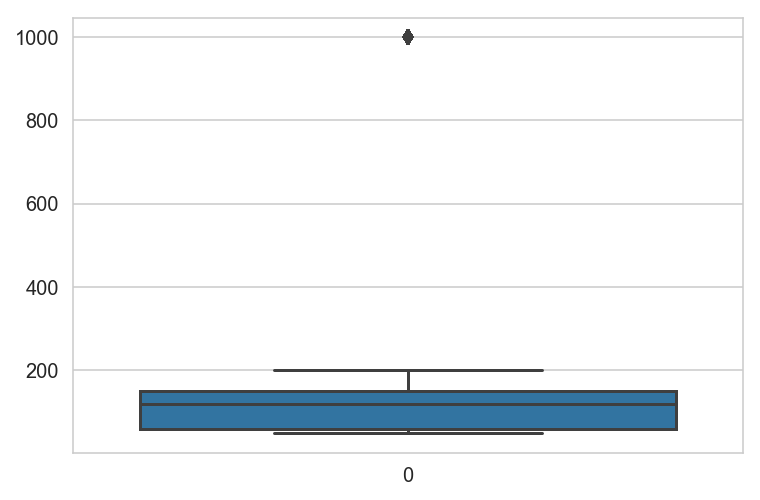

In [190]:
#look at outlier
_ = sns.boxplot(data=job_data.upper)

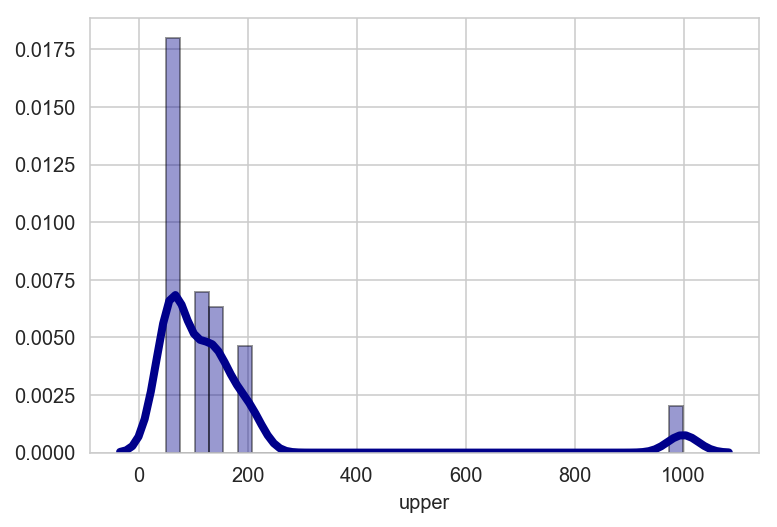

In [191]:
# Density Plot and Histogram of all arrival outlier 
sns.distplot(job_data.upper, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [192]:
## delete outlier
data=job_data[job_data.upper <=250.0]
clean_data =data[data.job_title!="Customer Service"]

#compare shape
display(data.shape)
display(clean_data.shape)

(20727, 11)

(20707, 11)

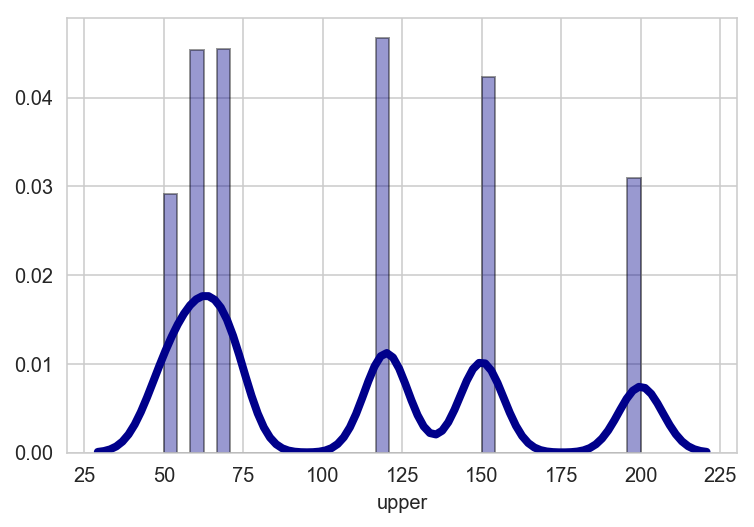

In [193]:
# Density Plot and Histogram of all arrival outlier 
sns.distplot(clean_data.upper, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

this data look much better after deleting outlier and job title = customer service

<a id='1.2EDA'></a>
## 1.2 EDA

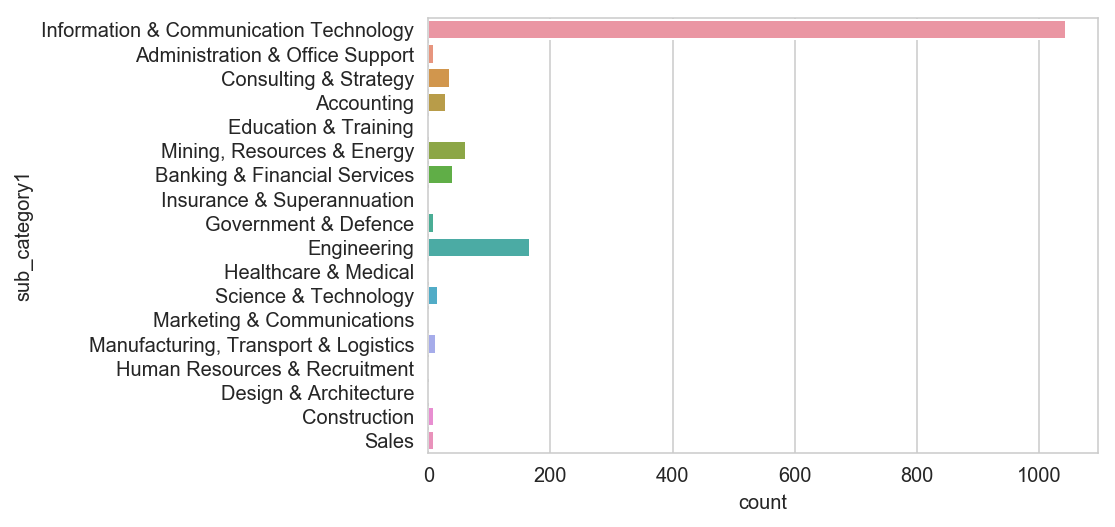

In [194]:
sns.countplot(y="sub_category1", data=all_job)
plt.show()

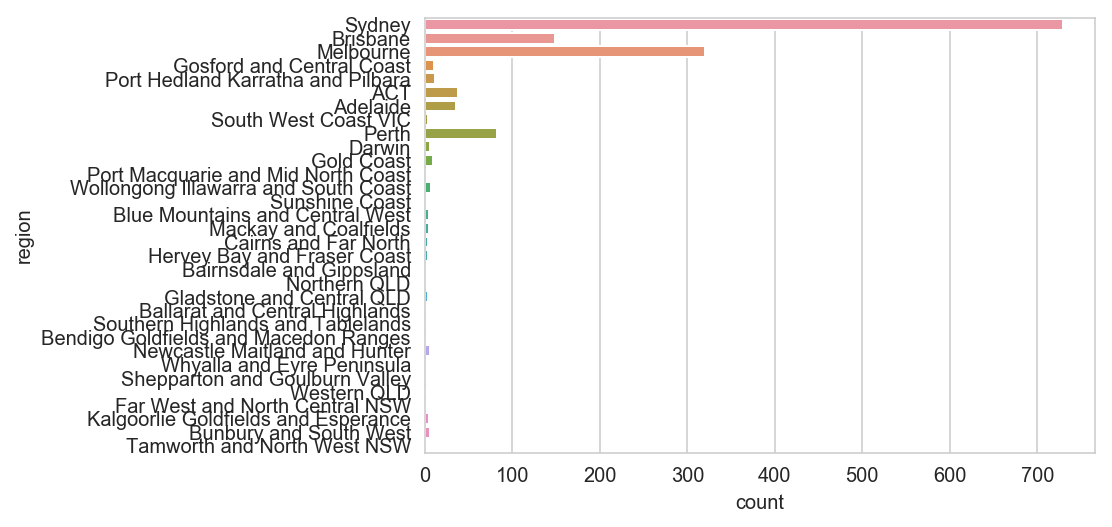

In [195]:
sns.countplot(y="region", data=all_job)
plt.show()

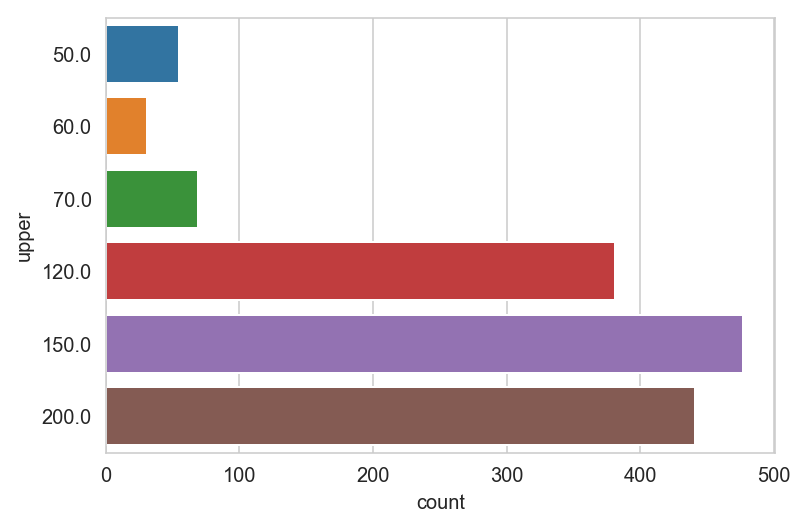

they are majority earning above 120


In [36]:
sns.countplot(y="upper", data=all_job)
plt.show()
print('they are majority earning above 120')

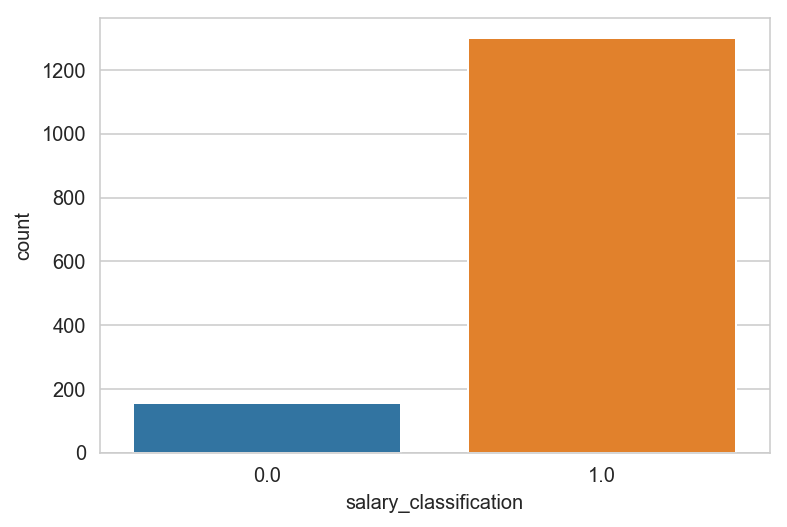

as previous graph has shown this is another confirmation to support previous graph


In [37]:
sns.countplot(x="salary_classification", data=all_job)
plt.show()
print('as previous graph has shown this is another confirmation to support previous graph')

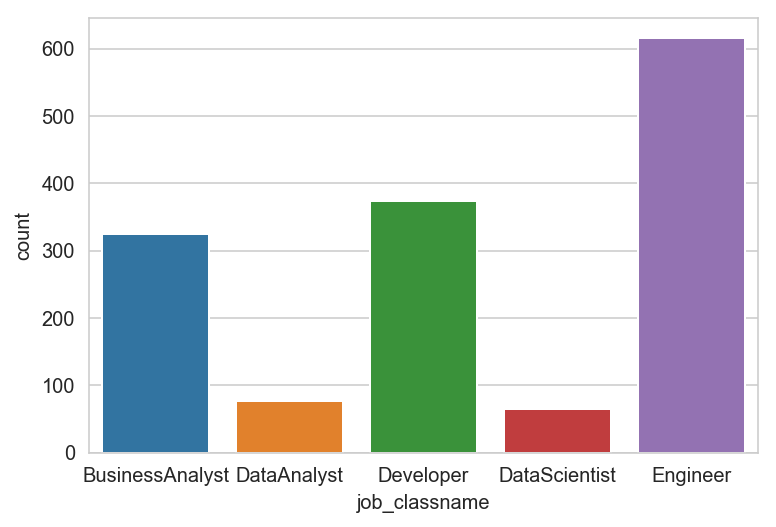

data engineering dominated


In [38]:
sns.countplot(x="job_classname", data=all_job)
plt.show()
print('data engineering dominated')

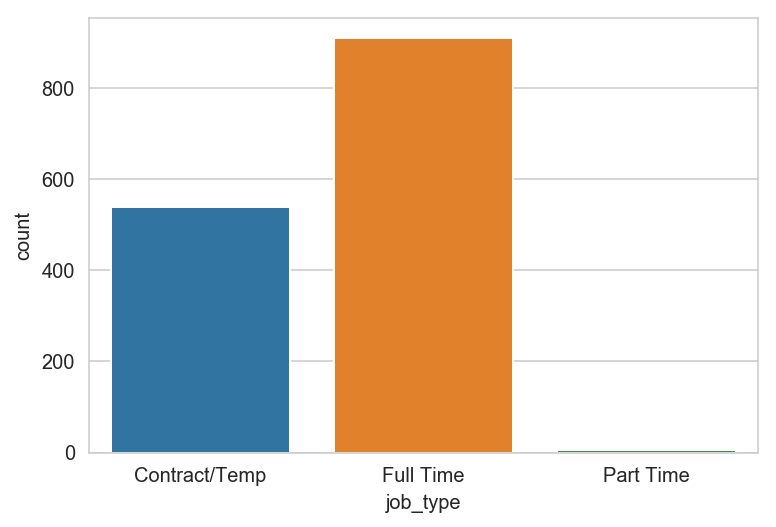

full time still the overall job type


In [39]:
sns.countplot(x="job_type", data=all_job)
plt.show()
print('full time still the overall job type')

In [40]:
all_job.head(2)

,job_title,company,date_posted,description,sub_category1,sub_category2,job_type,suburb,region,upper,...,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None,job_class,job_classname
24,Business Analyst Legacy Data Conversion,Talent – Winner ‘Seek Large Recruitment Agency...,18-Oct-18,Darwin based Large program Healthcare do...,Information & Communication Technology,Business/Systems Analysts,Contract/Temp,NaN,Sydney,50.0,...,0,1,0,0,0,0,0,0,1,BusinessAnalyst
28,Senior Business Analyst Big Data Singapo,Ethos BeathChapman,17-Oct-18,VP Senior Business Analyst Big Data Singapore...,Information & Communication Technology,Business/Systems Analysts,Full Time,NaN,Sydney,50.0,...,0,1,0,0,0,0,0,0,1,BusinessAnalyst


<a id='StemmerandVectorization'></a>
## 2. Stemmer and Vectorization
https://github.com/justmarkham/pandas-videos/blob/master/pandas.ipynb

#### Lemmatization

Lemmatization is a process where we convert words to its root word.

For example: ‘Studying’ becomes ‘Study’, ‘Meeting becomes ‘Meet’, ‘Better’ and ‘Best’ becomes ‘Good’.

The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns.

In [196]:
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer,PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
def lemmatize_word(words):
    lemma=WordNetLemmatizer()
    words = word_tokenize(words)
    lemma_list=[]
    for w in words:
        lemma_list.append(lemma.lemmatize(w))
    return (" ".join(lemma_list))

def stemming(words):
    stem=PorterStemmer()#SnowballStemmer()
    words = word_tokenize(words)
    stem_list=[]
    for w in words:
        stem_list.append(stem.stem(w))
    return (" ".join(stem_list))
stemming_description=[]

def stem_and_lemma(words):
    new_article=lemmatize_word(words)
    new_article=stem_word(words)
    
#    stemmer = PorterStemmer()
#    stemmer = SnowballStemmer("english")
#    lancaster_stemmer = LancasterStemmer()
#    wordnet_lemmatizer = WordNetLemmatizer()

#### Vectorization

#### CountVectorizer

    - dictionary to have a fixed size, only keeping words of certain frequencies, however, we still have to compute a dictionary and hold the dictionary in memory. 
    
    - This could be a problem when we have a large corpus or in streaming applications where we don't know which words we will encounter in the future
    
#### HashingVectorizer

    -solved CountVectorizer problem
    -which converts a collection of text documents to a matrix of occurrences calculated with the hashing trick. 
    -Each word is mapped to a feature with the use of a hash function that converts it to a hash. 
    -If we encounter that word again in the text, it will be converted to the same hash, allowing us to count word occurence without retaining a dictionary in memory
    
    -The main drawback of the this trick is that it's not possible to compute the inverse transform, and thus we lose information on what words the important features correspond to. The hash function employed is the signed 32-bit version of Murmurhash3.
    
#### TfidfVectorizer

    - Common words are penalized
    - Rare words have more influence
    - Sklearn provides a tf-idf vectorizer that works similarly to the other vectorizers we've covered. Notice that we can also eliminate stop words to improve our analysis.
   

<a id='3Cleaningdata'></a>
## 3 Cleaning data

In [197]:
#cleaning
clean_data.replace('[\[\]]', '')
clean_data.replace('2019', '')
clean_data.replace('\x27', '')
clean_data.replace('&', '')

clean_data.replace(inplace=True,to_replace="\2019",value=" ")
clean_data['job_title'] = clean_data['job_title'].str.strip('2019')
clean_data['job_title'] = clean_data['job_title'].str.replace('[^\w\s\&\<\>]','') #[^\w\s\&\<\>]
clean_data['job_title'] = clean_data['job_title'].str.replace("[({':]",'')
clean_data['job_title'] = clean_data['job_title'].str.replace('2','').str.replace('3','').str.replace('4','').str.replace('5','').str.replace('6','').str.replace('7','').str.replace('8','').str.replace('9','').str.replace('0','')
clean_data['job_title'] = clean_data['job_title'].str.replace("T+O+M ",'TOM').astype(str)
clean_data['job_title'] = clean_data['job_title'].str.strip('(<a href.*>{1})|(<a class.*>{1})|(\\t)|(<[\/]?[a-zA-Z0-9]{0,10}[\/]?>)')

#cleaning job title
choosen_column.sub_category1.replace(regex=True,inplace=True,to_replace="&",value="and")
choosen_column.sub_category2.replace(regex=True,inplace=True,to_replace="&",value="and")
choosen_column.job_title.replace(regex=True,inplace=True,to_replace="/",value="or")
choosen_column.job_title.replace(regex=True,inplace=True,to_replace="-",value=" ")
choosen_column.job_title.replace(inplace=True,to_replace="[",value="")
choosen_column.job_title.replace(inplace=True,to_replace="]",value="")
choosen_column.job_title.replace(inplace=True,to_replace="&",value="and")
choosen_column.job_title.replace(inplace=True,to_replace=" | ",value=" ")
choosen_column.job_title.replace(inplace=True,to_replace="(",value=" ")
choosen_column.job_title.replace(inplace=True,to_replace=")",value=" ")

#clean decription

clean_data['description'] = clean_data['description'].str.strip('2019')
clean_data['description'] = clean_data['description'].str.replace('[^\w\s\&\<\>]','') #[^\w\s\&\<\>]
clean_data['description'] = clean_data['description'].str.replace("[({':]",'')
clean_data['description'] = clean_data['description'].str.replace('2','').str.replace('3','').str.replace('4','').str.replace('5','').str.replace('6','').str.replace('7','').str.replace('8','').str.replace('9','').str.replace('0','')
clean_data['description'] = clean_data['description'].str.replace("T+O+M ",'TOM').astype(str)
clean_data['description'] = clean_data['description'].str.strip('(<a href.*>{1})|(<a class.*>{1})|(\\t)|(<[\/]?[a-zA-Z0-9]{0,10}[\/]?>)')
clean_data['description'] = clean_data['description'].str.strip('&')
clean_data.description.replace(regex=True,inplace=True,to_replace="\'s",value="")
clean_data.description.replace(regex=True,inplace=True,to_replace="xe2\x80\xa2",value="")
clean_data.description.replace(regex=True,inplace=True,to_replace="<br>",value="")
clean_data.description.replace(regex=True,inplace=True,to_replace="</em>",value="")
clean_data.description.replace(regex=True,inplace=True,to_replace="<em>",value="")

#clean region
clean_data['region'] = clean_data['region'].str.replace('[^\w\s\&\<\>]','') #[^\w\s\&\<\>]
clean_data['region'] = clean_data['region'].str.replace("&",'and')
clean_data['region'] = clean_data['region'].str.replace('2','').str.replace('3','').str.replace('4','').str.replace('5','').str.replace('6','').str.replace('7','').str.replace('8','').str.replace('9','').str.replace('0','')

<a id='Workwithjobtitle'></a>
## 4 Work with jobtitle

In [198]:
state_matrix=clean_data.copy()
state_matrix['State_Victoria']=np.where((state_matrix['region']=='Melbourne')|
                              (state_matrix['region']=='South West Coast VIC')|
                              (state_matrix['region']=='Yarra Valley & High Country')|
                              (state_matrix['region']=='YShepparton & Goulburn Valley')|
                               (state_matrix['region']=='West Gippsland & Latrobe Valley')|
                               (state_matrix['region']=='Bairnsdale & Gippsland')|
                               (state_matrix['region']=='Ballarat & Central Highlands')|
                               (state_matrix['region']=='Bendigo, Goldfields & Macedon Ranges')|
                               (state_matrix['region']=='Mildura & Murray')|
                              (state_matrix['region']=='Mornington Peninsula & Bass Coast')|
                              (state_matrix['region']=='Horsham & Grampians')
                              ,1,0)
state_matrix['State_Queensland']=np.where((state_matrix['region']=='Western QLD')|
                                (state_matrix['region']=='Brisbane')|
                                (state_matrix['region']=='Mackay & Coalfields')|
                                (state_matrix['region']=='Cairns & Far North')|
                                (state_matrix['region']=='Gladstone & Central QLD')|
                                (state_matrix['region']=='Northern QLD')|
                                (state_matrix['region']=='Rockhampton & Capricorn Coast')|
                                (state_matrix['region']=='Toowoomba & Darling Downs')|
                                (state_matrix['region']=='Hervey Bay & Fraser Coast')|
                                (state_matrix['region']=='Bundaberg & Wide Bay Burnett')|
                                (state_matrix['region']=='Somerset & Lockyer')|
                                (state_matrix['region']=='Sunshine Coast') ,1,0)

state_matrix['State_New_South_Wales']=np.where((state_matrix['region']=='Sydney')|
                                (state_matrix['region']=='Newcastle, Maitland & Hunter')|
                                (state_matrix['region']=='Gold Coast')|
                                (state_matrix['region']=='Wollongong, Illawarra & South Coast')|
                                (state_matrix['region']=='Tamworth & North West NSW')|
                                (state_matrix['region']=='Central NSW')|
                                (state_matrix['region']=='Lismore & Far North Coast')|
                                (state_matrix['region']=='Southern Highlands & Tableland')|
                                (state_matrix['region']=='Tumut, Snowy & Monaro')|
                                (state_matrix['region']=='Wagga Wagga & Riverina')|
                                (state_matrix['region']=='Blue Mountains & Central West')|
                                (state_matrix['region']=='Gosford & Central Coast')|
                                (state_matrix['region']=='Coffs Harbour & North Coast')|
                                (state_matrix['region']=='Albury Area')|
                                (state_matrix['region']=='Richmond & Hawkesbury')|
                                (state_matrix['region']=='Port Macquarie & Mid North Coast')|
                                (state_matrix['region']=='Far West & North Central NSW')|
                                (state_matrix['region']=='Dubbo & Central NSW'),1,0)

state_matrix['State_Western_Australia']=np.where((state_matrix['region']=='Perth')|
                                       (state_matrix['region']=='Kalgoorlie, Goldfields & Esperance')|
                                       (state_matrix['region']=='Bunbury & South West')|
                                       (state_matrix['region']=='Port Hedland, Karratha & Pilbara')|
                                       (state_matrix['region']=='Broome & Kimberley')|
                                       (state_matrix['region']=='Geraldton, Gascoyne & MidwestGeraldton')|
                                       (state_matrix['region']=='Northam & Wheatbelt')|
                                       (state_matrix['region']=='Mandurah & Peel')|
                                       (state_matrix['region']=='Albany & Great Southern'),1,0)


state_matrix['State_Australian_Capital_Territory']=np.where((state_matrix['region']=='ACT')|
                                                   (state_matrix['region']=='Coober Pedy & Outback SA')
                                                  ,1,0)

state_matrix['State_South_Australia']=np.where((state_matrix['region']=='Adelaide')|
                                     (state_matrix['region']=='Riverland & Murray Malleewhich')|
                                     (state_matrix['region']=='Adelaide Hills & Barossa')|
                                     (state_matrix['region']=='Yorke Peninsula & Clare Valley')|
                                     (state_matrix['region']=='Fleurieu Peninsula & Kangaroo Island')|
                                     (state_matrix['region']=='Whyalla & Eyre Peninsula')|
                                     (state_matrix['region']=='Mt Gambier & Limestone Coast')
                                     ,1,0)

state_matrix['State_State_Northern_Territory']=np.where((state_matrix['region']=='Darwin')|
                                     (state_matrix['region']=='Alice Springs & Central Australia')|
                                     (state_matrix['region']=='Katherine & Northern Australia')
                                     ,1,0)

state_matrix['State_Tasmania']=np.where((state_matrix['region']=='Hobart')|
                                        (state_matrix['region']=='Launceston & North East')|
                                        (state_matrix['region']=='Devonport & North West')|
                                        (state_matrix['region']=='Central & South East TAS')
                              
                                        ,1,0)
state_matrix['State_None']=np.where((state_matrix['region']=='Ireland')|
                          (state_matrix['region']=='0')
                          ,1,0)
#total=state_matrix.State_Victoria.value_counts()[1]+state_matrix.State_Queensland.value_counts()[1]+state_matrix.State_New_South_Wales.value_counts()[1]+state_matrix.State_Western_Australia.value_counts()[1]+state_matrix.State_Australian_Capital_Territory.value_counts()[1]+state_matrix.State_South_Australia.value_counts()[1]+state_matrix.State_Northern_Territory.value_counts()[1]+state_matrix.State_Tasmania.value_counts()[1]+state_matrix.State_None.value_counts()[1]

print ('state_matrix',state_matrix.region.shape)
#print ('total',total)

#state_matrix=state_matrix[['State_Victoria','State_Queensland','State_New_South_Wales','State_Western_Australia',
#                       'State_Australian_Capital_Territory','State_South_Australia','State_Northern_Territory',
#                       'State_Tasmania','State_None']]
state_matrix_clean=state_matrix.iloc[:,11:]
state_matrix_clean.head(2)

('state_matrix', (20707,))


,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0


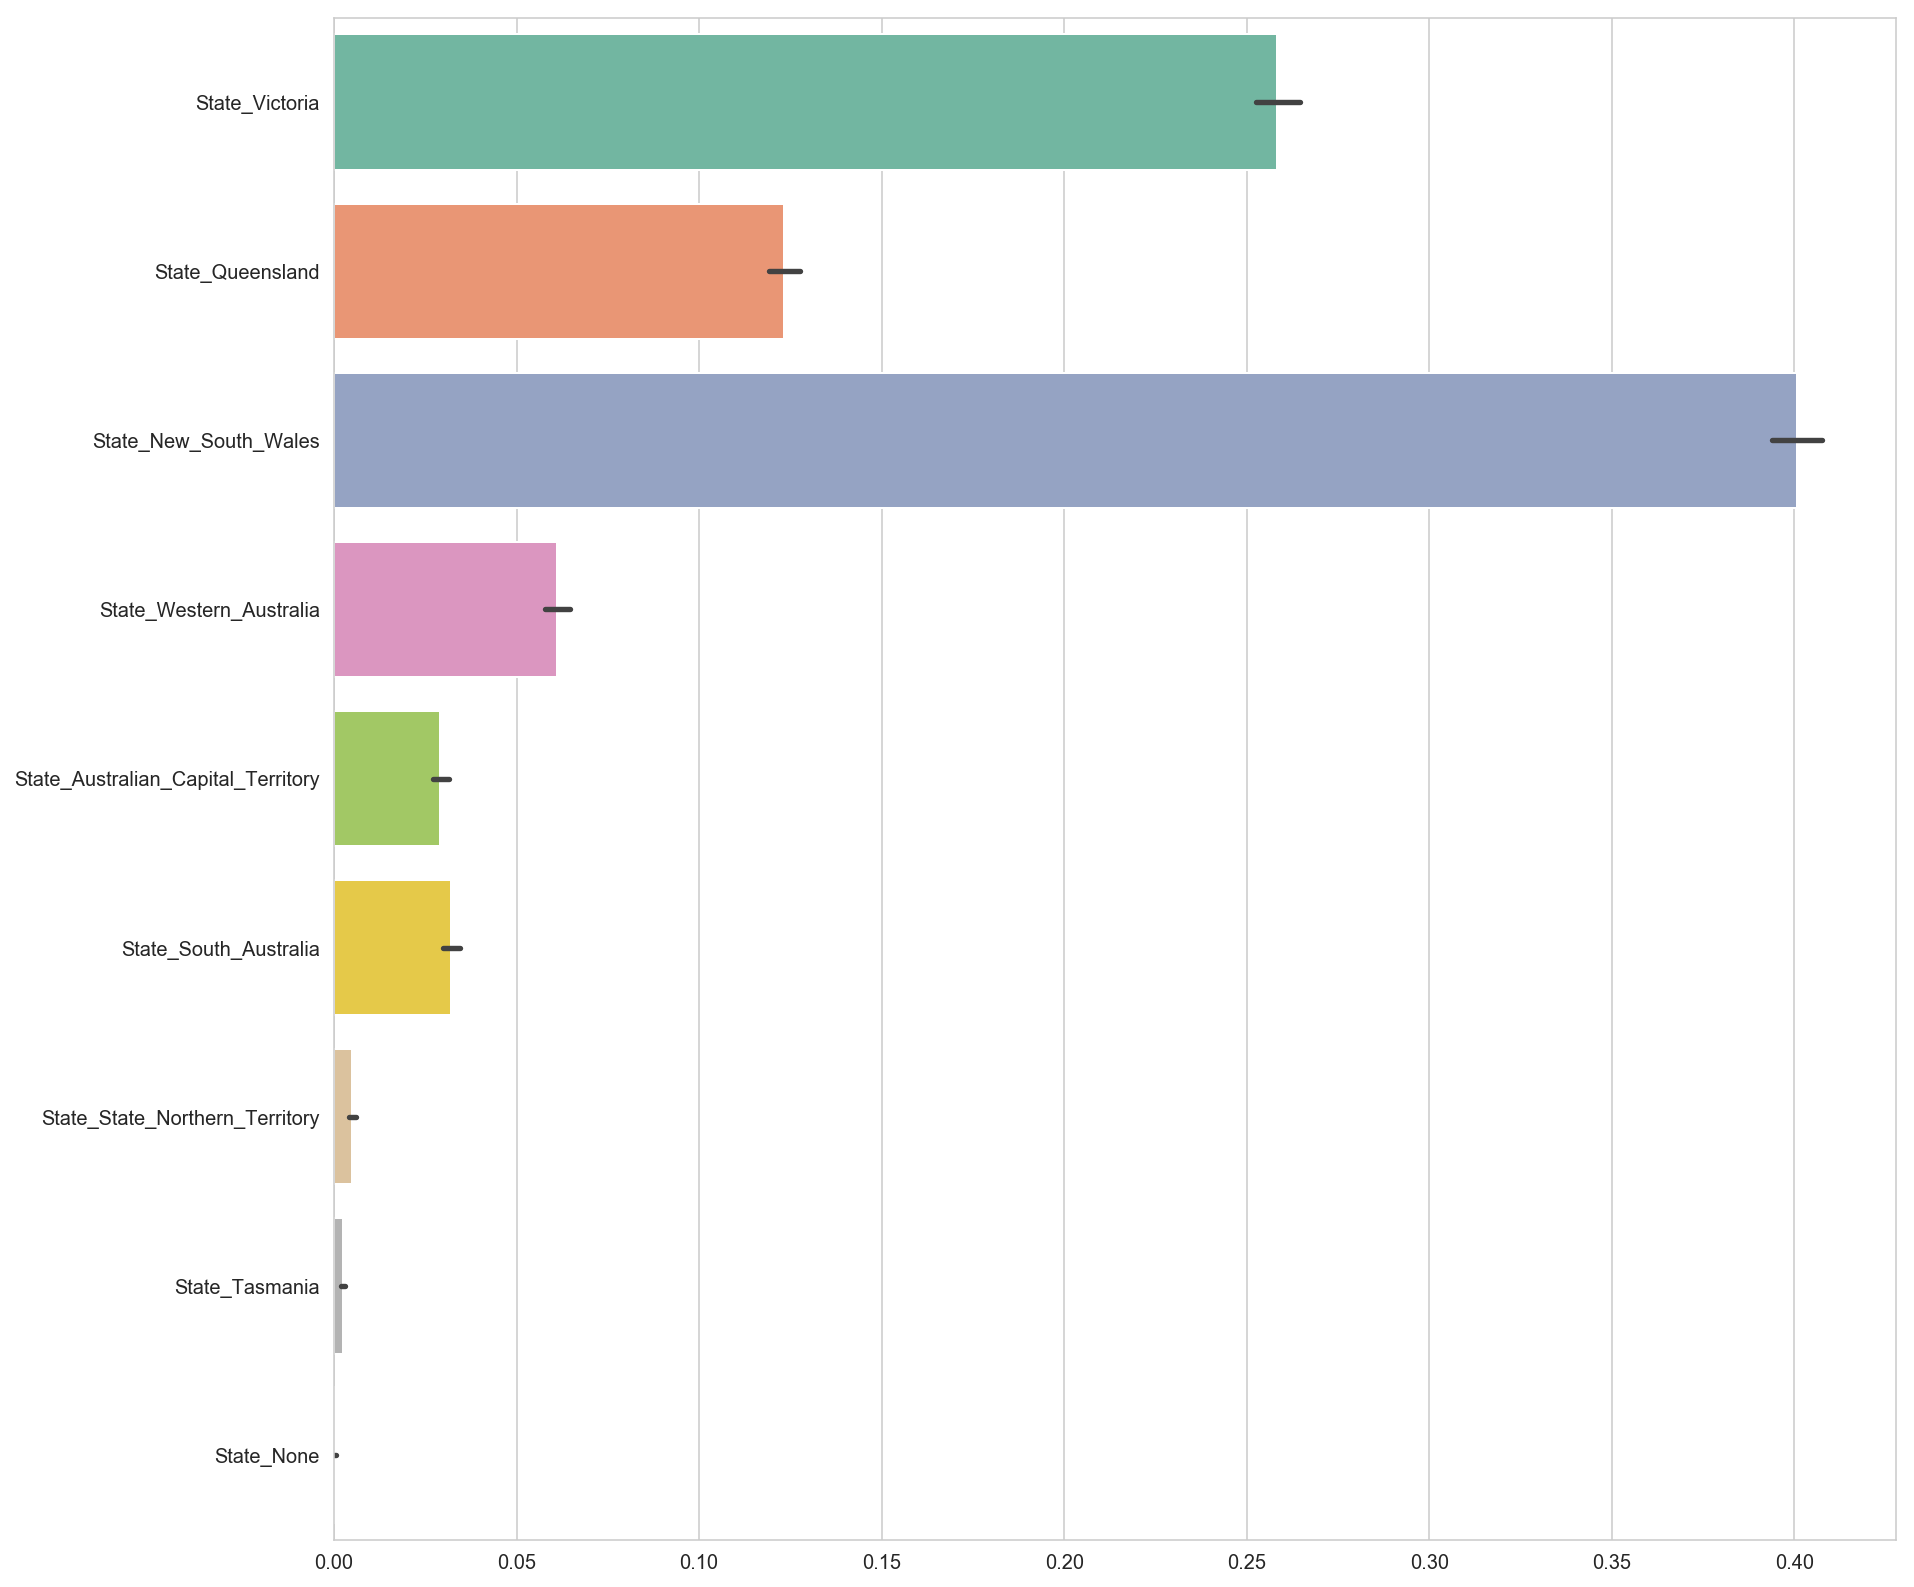

In [199]:
plt.figure(figsize=(14,14))
sns.barplot(data=state_matrix_clean, palette="Set2",orient='h')

<a id='Workwithskills'></a>
## 5 Work with skills

In [200]:
skill_matrix = clean_data.copy(deep=True)

In [201]:
def sql(x):
    if 'sql' in x:
        return 1
    return 0

skill_matrix['skill_sql'] = clean_data['description'].apply(sql)

def excel(x):
    if 'excel' in x:
        return 1
    return 0

skill_matrix['skill_excel'] = clean_data['description'].apply(excel)

def python(x):
    if 'python' in x:
        return 1
    return 0

skill_matrix['skill_python'] = clean_data['description'].apply(python)

def tableau(x):
    if 'tableau' in x:
        return 1
    return 0

skill_matrix['skill_tableau'] = clean_data['description'].apply(tableau)

def spark(x):
    if 'spark' in x:
        return 1
    return 0

skill_matrix['skill_spark'] = clean_data['description'].apply(spark)

def aws(x):
    if 'aws' in x:
        return 1
    return 0

skill_matrix['skill_aws'] = clean_data['description'].apply(aws)

def hadoop(x):
    if 'hadoop' in x:
        return 1
    return 0

skill_matrix['skill_hadoop'] = clean_data['description'].apply(hadoop)

def sas(x):
    if 'sas' in x:
        return 1
    return 0

skill_matrix['skill_sas'] = clean_data['description'].apply(sas)

def java(x):
    if 'java' in x:
        return 1
    return 0

skill_matrix['skill_java'] = clean_data['description'].apply(java)

def PHP(x):
    if 'PHP' in x:
        return 1
    return 0

skill_matrix['skill_PHP'] = clean_data['description'].apply(PHP)

def Ruby(x):
    if 'Ruby' in x:
        return 1
    return 0

skill_matrix['skill_Ruby'] = clean_data['description'].apply(Ruby)

def JavaScript(x):
    if 'JavaScript' in x:
        return 1
    return 0

skill_matrix['skill_JavaScript'] = clean_data['description'].apply(JavaScript)

def TypeScript(x):
    if 'TypeScript' in x:
        return 1
    return 0

skill_matrix['skill_TypeScript'] = clean_data['description'].apply(TypeScript)

def Rust(x):
    if 'Rust' in x:
        return 1
    return 0

skill_matrix['skill_Rust'] = clean_data['description'].apply(Rust)

def git(x):
    if 'git' in x:
        return 1
    return 0

skill_matrix['skill_git'] = clean_data['description'].apply(git)

def swift(x):
    if 'swift' in x:
        return 1
    return 0

skill_matrix['skill_swift'] = clean_data['description'].apply(swift)

def PERL(x):
    if 'PERL' in x:
        return 1
    return 0

skill_matrix['skill_PERL'] = clean_data['description'].apply(PERL)

def UNIX(x):
    if 'UNIX' in x:
        return 1
    return 0

skill_matrix['skill_UNIX'] = clean_data['description'].apply(UNIX)

def XML(x):
    if 'skill_XML' in x:
        return 1
    return 0

skill_matrix['skill_XML'] = clean_data['description'].apply(XML)

def PostgreSQL(x):
    if 'PostgreSQL' in x:
        return 1
    return 0

skill_matrix['skill_PostgreSQL'] = clean_data['description'].apply(PostgreSQL)

def ShellScripting(x):
    if 'Shell' in x:
        return 1
    return 0

skill_matrix['skill_Shell_Scripting'] = clean_data['description'].apply(ShellScripting)

def BashScripting(x):
    if 'Bash' in x:
        return 1
    return 0

skill_matrix['skill_Bash_Scripting'] = clean_data['description'].apply(BashScripting)

def Cisco(x):
    if 'Cisco' in x:
        return 1
    return 0

skill_matrix['skill_Cisco'] = clean_data['description'].apply(Cisco)

def Sybase(x):
    if 'Sybase' in x:
        return 1
    return 0

skill_matrix['skill_Sybase'] = clean_data['description'].apply(Sybase)

def Oracle(x):
    if 'Oracle' in x:
        return 1
    return 0

skill_matrix['skill_Oracle'] = clean_data['description'].apply(Oracle)

def Django(x):
    if 'Django' in x:
        return 1
    return 0

skill_matrix['skill_Django'] = clean_data['description'].apply(Django)

def Flask(x):
    if 'Flask' in x:
        return 1
    return 0

skill_matrix['skill_Flask'] = clean_data['description'].apply(Flask)

def Lambda(x):
    if 'Lambda' in x:
        return 1
    return 0

skill_matrix['skill_Lambda'] = clean_data['description'].apply(Lambda)

def PLSQL(x):
    if 'PL/SQL' in x:
        return 1
    return 0


skill_matrix['Pskill_LSQL'] = clean_data['description'].apply(PLSQL)

matrix_skill_clean=skill_matrix.iloc[:,11:]
matrix_skill_clean.head(2)

,skill_sql,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,...,skill_PostgreSQL,skill_Shell_Scripting,skill_Bash_Scripting,skill_Cisco,skill_Sybase,skill_Oracle,skill_Django,skill_Flask,skill_Lambda,Pskill_LSQL
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


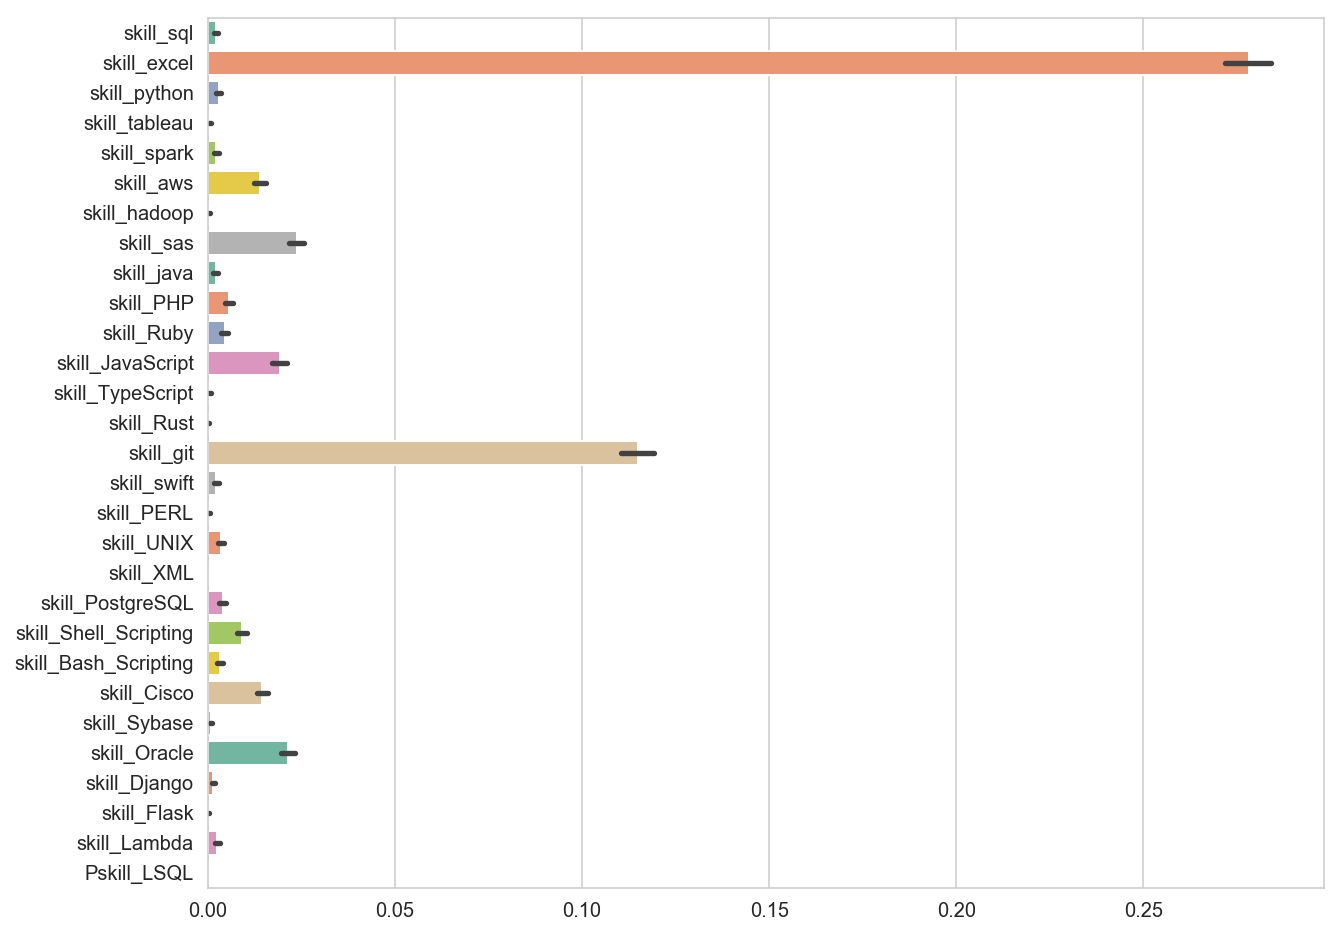

In [202]:
plt.figure(figsize=(10,8))
sns.barplot(data=matrix_skill_clean, palette="Set2",orient='h')

<a id='JobClassification'></a>
## 6 Work with job classification 

In [203]:
#combine matrix
results = pd.concat([clean_data,matrix_skill_clean, state_matrix_clean], axis=1)

BusinessAnalyst=results[results['job_title'].str.contains("Business Analyst")]
DataAnalyst=results[results['job_title'].str.contains("Data Analyst")]
Developer=results[results['job_title'].str.contains("Developer")]
DataScientist=results[results['job_title'].str.contains("Data Scientist")]
Engineer=results[results['job_title'].str.contains("Engineer")]

BusinessAnalyst['job_class']= 1
DataAnalyst['job_class']= 2
Developer['job_class']= 3
DataScientist['job_class']= 4
Engineer['job_class']= 5

BusinessAnalyst['job_classname']= 'BusinessAnalyst'
DataAnalyst['job_classname']= 'DataAnalyst'
Developer['job_classname']= 'Developer'
DataScientist['job_classname']= 'DataScientist'
Engineer['job_classname']= 'Engineer'

print BusinessAnalyst.job_class.value_counts()
print DataAnalyst.job_class.value_counts()
print Developer.job_class.value_counts()
print DataScientist.job_class.value_counts()
print Engineer.job_class.value_counts()

#append
all_job = BusinessAnalyst.append([DataAnalyst, Developer,DataScientist,Engineer])
all_job_cleaning=all_job.iloc[:,3:]
#dropping column 
all_job_clean=all_job_cleaning.drop(['sub_category2','region','suburb','upper'], axis=1)
all_job.head(2)

1    325
Name: job_class, dtype: int64
2    77
Name: job_class, dtype: int64
3    373
Name: job_class, dtype: int64
4    64
Name: job_class, dtype: int64
5    615
Name: job_class, dtype: int64


,job_title,company,date_posted,description,sub_category1,sub_category2,job_type,suburb,region,upper,...,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None,job_class,job_classname
24,Business Analyst Legacy Data Conversion,Talent – Winner ‘Seek Large Recruitment Agency...,18-Oct-18,Darwin based Large program Healthcare do...,Information & Communication Technology,Business/Systems Analysts,Contract/Temp,NaN,Sydney,50.0,...,0,1,0,0,0,0,0,0,1,BusinessAnalyst
28,Senior Business Analyst Big Data Singapo,Ethos BeathChapman,17-Oct-18,VP Senior Business Analyst Big Data Singapore...,Information & Communication Technology,Business/Systems Analysts,Full Time,NaN,Sydney,50.0,...,0,1,0,0,0,0,0,0,1,BusinessAnalyst


In [204]:
all_job_clean.shape

(1454, 44)

## Modelling preparation

In [205]:
#stemmer
def stemming(words):
    stem=PorterStemmer()#SnowballStemmer()
    words = word_tokenize(words)
    stem_list=[]
    for w in words:
        stem_list.append(stem.stem(w))
    return (" ".join(stem_list))
stemming_description=[]

In [206]:
clean_data['stem_jobtitle']=clean_data.job_title.apply(lambda x : stemming(x))

In [49]:
#add more word
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)
#using TfidfVectorizer
Tfidfvec = TfidfVectorizer(stop_words=custom_stop_words, max_features=99, ngram_range=(2,3))
Tfidfvectorizers = Tfidfvec.fit_transform(clean_data.stem_jobtitle.values)
job_title_Tfidfvectorizers  = pd.DataFrame(Tfidfvectorizers.todense(), columns=Tfidfvec.get_feature_names())

X=job_title_Tfidfvectorizers.copy()
y=clean_data.salary_classification
print X.shape
print y.shape

(20707, 99)
(20707,)


In [208]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)
X_df =clean_data[['stem_jobtitle']]
y=clean_data.salary_classification
#split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=1,train_size=0.7, stratify=y)

In [209]:
#TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=99)
X_train_me2 = vect.fit_transform(X_train.stem_jobtitle)
X_test_me2 = vect.transform(X_test.stem_jobtitle)

train_count_vect_df = pd.DataFrame(X_train_me2.todense(), columns=vect.get_feature_names())
test_count_vect_df = pd.DataFrame(X_test_me2.todense(), columns=vect.get_feature_names())

X_train_me2=pd.concat([X_train.drop('stem_jobtitle',axis=1).reset_index(drop=True), train_count_vect_df], axis=1)
X_test_me2=pd.concat([X_test.drop('stem_jobtitle',axis=1).reset_index(drop=True), test_count_vect_df], axis=1)

In [210]:
clean_data['stem_jobtitle'].head(2)

0    dministr assist data entri
1                  store person
Name: stem_jobtitle, dtype: object

In [37]:
X_test_me2.head(2)

,account manag,administr assistan,administr offi,analyst data,bi develop,big data,big data engin,busi anali,busi analyst,busi develop,...,solut archi,solut architect,stack develop,suppli chain,support offi,support offic,team lead,technic busi,technic busi analyst,technic lead
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='Q4Salaryclassification(abovemeanOrbelowmean)'></a>
##  Q4 Salary classification (above mean Or below mean)
<a id='Q4.1CrossValidationwithdifferentmodels'></a>
#### Q 4.1 Cross Validation with different models

In [42]:
# BASELINE ACCURACY
display(clean_data['salary_classification'].value_counts())
(clean_data['salary_classification'].value_counts(normalize=True)*100).max()

0.0    10360
1.0    10347
Name: salary_classification, dtype: int64

50.031390351089

In [38]:
from sklearn.svm import SVC, SVR
#gridsearch tuning

#lasso and ridge
c_space = np.logspace(-5, 8, 15)
CV=2
models = [
    #Ridge(alpha=optimal_ridge.alpha_),
    BaggingClassifier(base_estimator = LogisticRegression(random_state=48), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='rbf'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='poly'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = GaussianNB(), max_samples=0.5, max_features=0.5),
    XGBClassifier( learning_rate =0.1, n_estimators=100,max_depth=5, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
    GridSearchCV(LogisticRegression(random_state=48) ,param_grid={'C': c_space},cv=CV),
    GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [10, 40, 80],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]},scoring='accuracy',cv=CV,n_jobs=-1),
    GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=CV,n_jobs=-1),
    LogisticRegression(random_state=48),
    BaggingClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(kernel='rbf'),
    SVC(kernel='poly'),
    GaussianNB(),
    KNeighborsClassifier()
    #Lasso(alpha=optimal_lasso.alpha_)
    
]
CV=2
entries = []
cv_d = pd.DataFrame(index=range(CV * len(models)))
for i,model in enumerate(models):
    
    indexes = np.argsort(y_test)
    model_name = model.__class__.__name__
    print('processing',model_name,i)
    accuracies = cross_val_score(model,X_train_me2,y_train, cv=CV)
    R2_Cross_validated_scores =np.mean(accuracies)
    model.fit(X_train_me2,y_train)
    y_pred=model.predict(X_test_me2)
    train_score=model.score(X_train_me2,y_train)
    test_score=model.score(X_test_me2,y_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r,p = stats.pearsonr(y_test, y_pred)
    
    cv_ind = list(range(1,len(accuracies)+1))
    model_df = pd.DataFrame({'CV': cv_ind,'Accuracy': accuracies,'R2_Cross_validated_scores':R2_Cross_validated_scores,
                            'train_score':train_score,'test_score':test_score,
                           'RMSE':RMSE,'r2':r, 'pvalue':p})
    model_df['model_name'] = model_name
    model_df = model_df[['model_name','CV', 'Accuracy','train_score','test_score','RMSE','r2','pvalue']]
    
    if i == 0:
        cv_d = model_df
    else:
        cv_d = pd.concat([cv_d, model_df], axis = 0)

('processing', 'BaggingClassifier', 0)


/Applications/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


('processing', 'BaggingClassifier', 1)


/Applications/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('processing', 'BaggingClassifier', 2)


/Applications/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


('processing', 'BaggingClassifier', 3)
('processing', 'XGBClassifier', 4)
('processing', 'GridSearchCV', 5)
('processing', 'GridSearchCV', 6)
('processing', 'GridSearchCV', 7)
('processing', 'LogisticRegression', 8)
('processing', 'BaggingClassifier', 9)
('processing', 'RandomForestClassifier', 10)


/Applications/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('processing', 'MultinomialNB', 11)
('processing', 'SVC', 12)
('processing', 'SVC', 13)
('processing', 'GaussianNB', 14)
('processing', 'KNeighborsClassifier', 15)


In [39]:
cv_d.sort_values('test_score', ascending=False).head(8)#cv_d.groupby(['model_name']).max()

,model_name,CV,Accuracy,train_score,test_score,RMSE,r2,pvalue
1,RandomForestClassifier,2,0.641231,0.641300,0.641880,0.598431,0.366658,5.254652e-197
0,RandomForestClassifier,1,0.636815,0.641300,0.641880,0.598431,0.366658,5.254652e-197
0,LogisticRegression,1,0.638333,0.640334,0.641558,0.598700,0.365079,3.315141e-195
1,LogisticRegression,2,0.641093,0.640334,0.641558,0.598700,0.365079,3.315141e-195
0,GridSearchCV,1,0.639023,0.640127,0.641236,0.598969,0.366247,1.549745e-196
1,BaggingClassifier,2,0.640955,0.640196,0.641236,0.598969,0.364002,5.541361e-194
1,GridSearchCV,2,0.641093,0.640127,0.641236,0.598969,0.366247,1.549745e-196
0,BaggingClassifier,1,0.637643,0.640196,0.641236,0.598969,0.364002,5.541361e-194


<a id='4.2Votingclassifier'></a>
#### Q 4.2 Voting classifier

In [40]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='soft')

accuracies = cross_val_score(clf,X_train_me2,y_train, cv=2)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me2,y_train)
y_pred=model.predict(X_test_me2)
train_score=model.score(X_train_me2,y_train)
test_score=model.score(X_test_me2,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me2, y_train)
clf.score(X_test_me2, y_test)
y_pred = clf.predict(X_test_me2)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me2, y_train)
score_test= clf.score(X_test_me2, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.6399199668828481)
('y_pred:', array([1., 0., 0., ..., 0., 0., 0.]))
('score_train:', 0.6404719194149303)
('score_test:', 0.6412361178174795)
('R2:', 0.3662465636697446)
('p:', 1.549745483402721e-196)


In [322]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='hard')

accuracies = cross_val_score(clf,X_train_me2,y_train, cv=2)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me2,y_train)
y_pred=model.predict(X_test_me2)
train_score=model.score(X_train_me2,y_train)
test_score=model.score(X_test_me2,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me2, y_train)
clf.score(X_test_me2, y_test)
y_pred = clf.predict(X_test_me2)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me2, y_train)
score_test= clf.score(X_test_me2, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.63991996688284813)
('y_pred:', array([ 1.,  0.,  0., ...,  0.,  0.,  0.]))
('score_train:', 0.64040292534842003)
('score_test:', 0.64123611781747947)
('R2:', 0.36624656366974462)
('p:', 1.5497454834027209e-196)


<a id='4.3Lassoandridge'></a>
#### Q 4.3 Lasso and ridge

In [323]:
#guideline
optimal_lasso = LassoCV(cv=4).fit(X_train_me2,y_train)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso,X_train_me2,y_train, cv=4)
print('Optimal alpha:',optimal_lasso.alpha_)
print('Mean lasso CV R2:',np.mean(lasso_scores))

lasso.fit(X_train_me2,y_train)
y_pred=lasso.predict(X_test_me2)
print('Lasso train score:',lasso.score(X_train_me2,y_train))
print('Lasso test score:',lasso.score(X_test_me2,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 2.0807435834209545e-05)
('Mean lasso CV R2:', 0.22993613450674621)
('Lasso train score:', 0.23453013369736264)
('Lasso test score:', 0.23049869268597936)
('RMSE:', 0.43860606696185261)


In [320]:
#guideline
optimal_Ridge = RidgeCV(cv=4).fit(X_train_me2,y_train)

Ridge = Ridge(alpha=optimal_Ridge.alpha_)

Ridge_scores = cross_val_score(Ridge,X_train_me2,y_train, cv=4)
print('Optimal alpha:',optimal_Ridge.alpha_)
print('Mean lasso CV R2:',np.mean(Ridge_scores))

Ridge.fit(X_train_me2,y_train)
y_pred=Ridge.predict(X_test_me2)
print('Ridge train score:',Ridge.score(X_train_me2,y_train))
print('Ridge test score:',Ridge.score(X_test_me2,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 1.0)
('Mean lasso CV R2:', 0.22991205421850769)
('Lasso train score:', 0.23450177473623013)
('Lasso test score:', 0.2305648559468082)
('RMSE:', 0.43858721044325316)


<a id='4.4Comparemodels'></a>
#### Q 4.4 Compare models

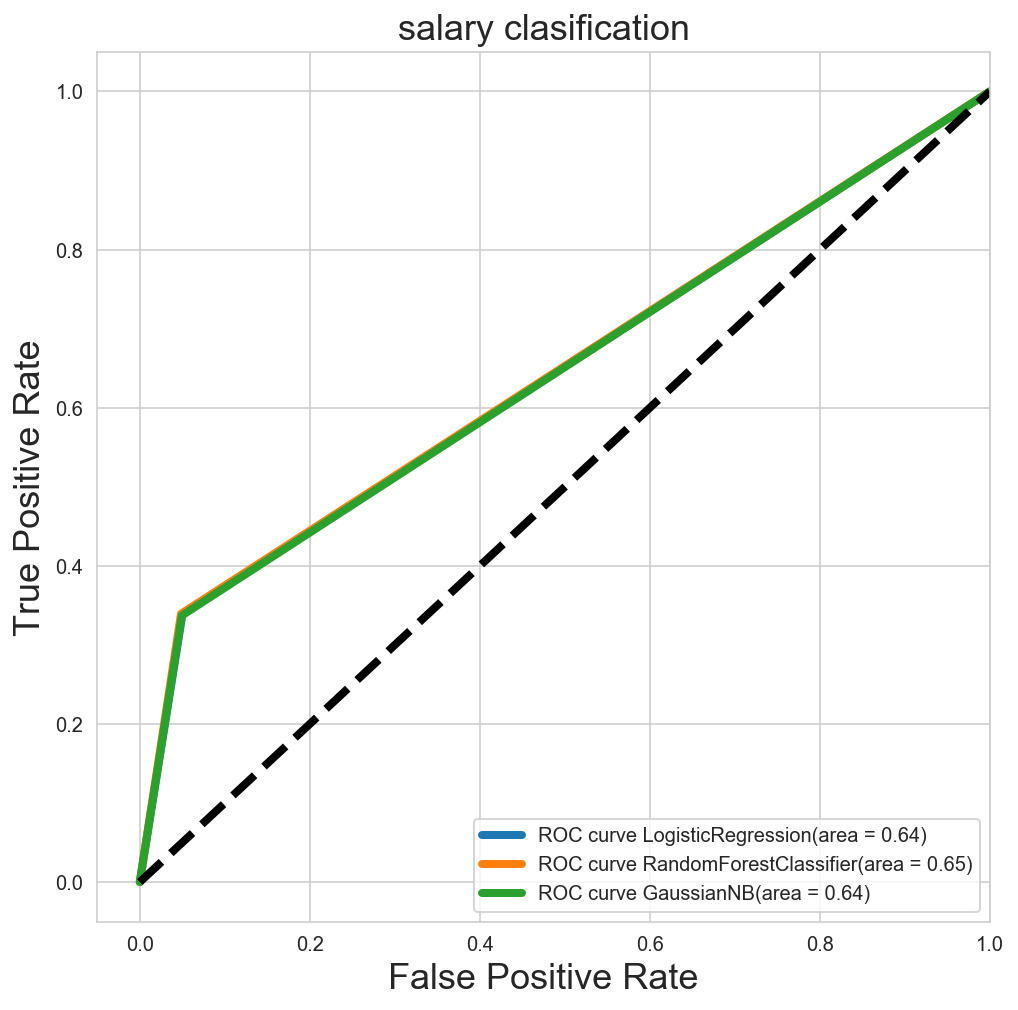

In [121]:
#rfc =RandomForestClassifier()
SEED=48
#model
model = LogisticRegression(penalty='l1',random_state=48)
model_rfc=RandomForestClassifier()
model_xgb = XGBClassifier()
model_bn=MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, X.index,test_size=0.33, random_state=48)

#fitting model
model.fit(X_train, y_train)
model_rfc.fit(X_train, y_train)
model_bn.fit(X_train, y_train)

#ypred
y_pred = model.predict(X_test)
y_predmodel_rfc = model_rfc.predict(X_test)
y_predmodel_bn = model_bn.predict(X_test)

#plot
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
fprrfc, tprrfc, _ = roc_curve(y_test, y_predmodel_rfc)
fprbn, tprbn, _ = roc_curve(y_test, y_predmodel_bn)

roc_auc = auc(fpr, tpr)
roc_aucrfc = auc(fprrfc, tprrfc)
roc_aucbn = auc(fprbn, tprbn)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve LogisticRegression(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fprrfc, tprrfc, label='ROC curve RandomForestClassifier(area = %0.2f)' % roc_aucrfc, linewidth=4)
plt.plot(fprbn, tprbn, label='ROC curve GaussianNB(area = %0.2f)' % roc_aucbn, linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('salary clasification', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#https://jakevdp.github.io/PythonDataScienceHandbook/index.html

<a id='4.5Bestmodels'></a>
#### Q 4.4 Best models

('Accuracy is: ', 0.6415580234991147)


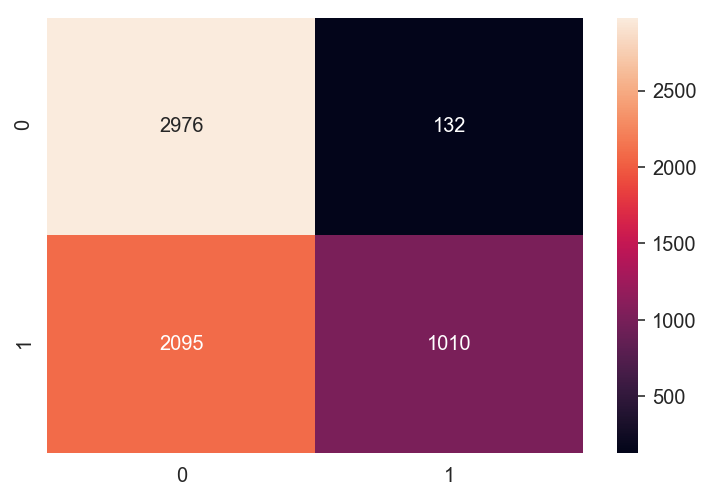

In [126]:
#LogisticRegression
lr = LogisticRegression(random_state=48)      
lr = lr.fit(X_train_me2,y_train)

ac = accuracy_score(y_test,lr.predict(X_test_me2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test_me2))
sns.heatmap(cm,annot=True,fmt="d")

In [211]:
model = LogisticRegression()
model.fit(X_train_me2, y_train)
y_pred = model.predict(X_test_me2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73      3108
         1.0       0.88      0.33      0.48      3105

   micro avg       0.64      0.64      0.64      6213
   macro avg       0.74      0.64      0.60      6213
weighted avg       0.74      0.64      0.60      6213



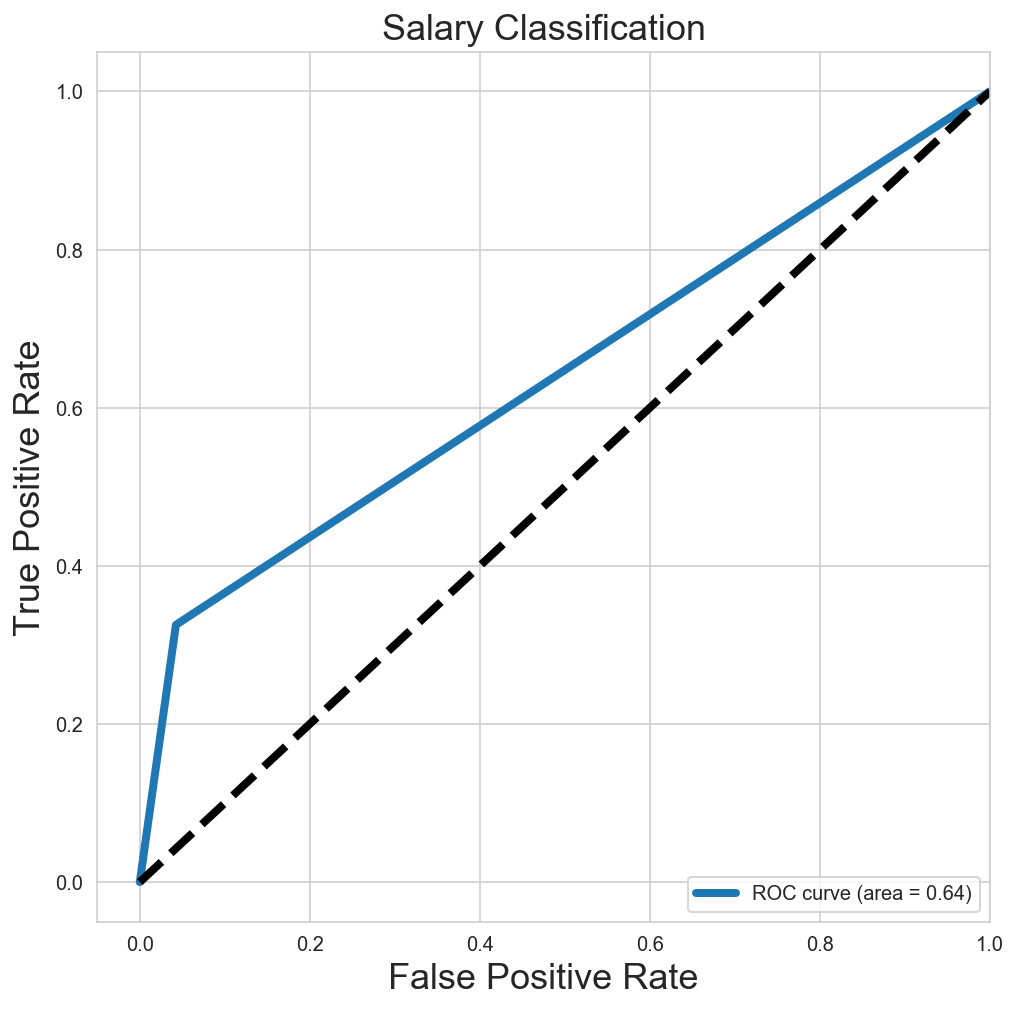

In [77]:
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#https://www.youtube.com/watch?v=85dtiMz9tSo

In [61]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
cols = list(X_train_me2.columns)
# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_train_me2, y_train)
skb_chi2.fit(X_train_me2, y_train)

# examine results
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.sort_values('f_classif', ascending=False).head(8)

,feature,f_classif,chi2 score
18,custom servic,409.144,294.708
8,busi analyst,157.536,128.254
7,busi anali,141.391,125.31
38,dministr assistan,140.464,137.81
63,project manag,134.305,125.598
83,servic offi,116.136,79.8229
93,support offi,101.707,93.314
29,data entri,99.5131,94.5022


In [72]:
X=job_title_Tfidfvectorizers.copy()
y=clean_data.salary_classification
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
selector = RFECV(lr, step=1, cv=2)
selector = selector.fit(X, y)

print(selector.support_);
print(selector.ranking_);

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
rfecv_columns = np.array(cols)[selector.support_]
lrcv = LogisticRegressionCV(penalty='l1', Cs=100, cv=10, solver='liblinear')
lrcv.fit(X, y)
lrcv.C_

array([1.91791026])

<Figure size 576x576 with 0 Axes>

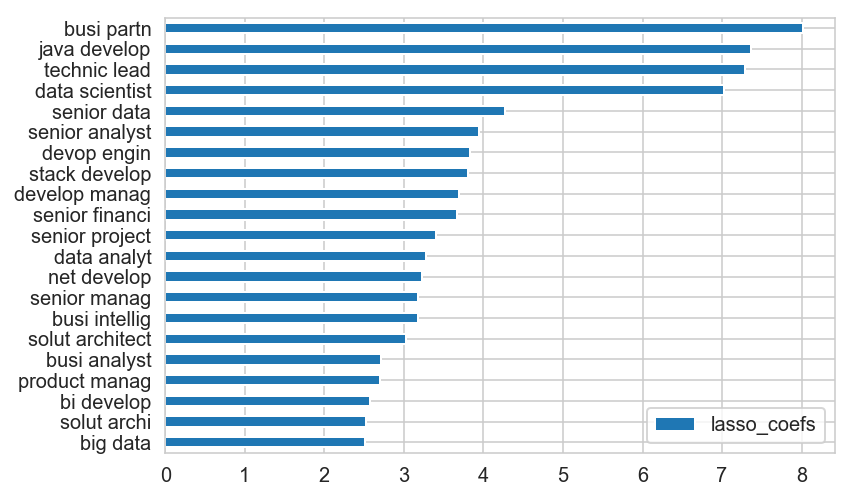

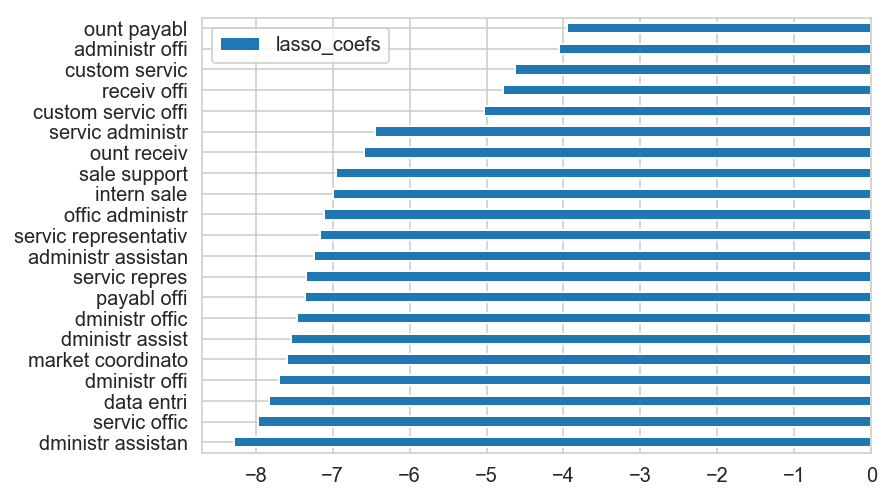

In [314]:
# What are the best coefficients according to a model using lasso?
coeffs = pd.DataFrame(lrcv.coef_, columns=X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['lasso_coefs']
coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)
coeffs_abs
kbest_columns = kbest.feature.values[0:5]
lasso_columns = coeffs_abs.index[coeffs_t.lasso_coefs != 0]

lr = LogisticRegression(C=lrcv.C_[0], penalty='l1', solver='liblinear')

# defining a function to test our best features head-to-head
def score(X):
    scores = cross_val_score(lr, X, y, cv=5)
    return scores.mean(), scores.std()

# list of all our lists of best features being executed in the score function
all_scores = [
    score(X[kbest_columns]),
   # score(X[rfecv_columns]),
    score(X[lasso_columns]),
    score(X)]

#putting results into a dataframe
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest', 'lr', 'all'])

plt.figure(figsize=[8,8])
coeffs_t.sort_values('lasso_coefs').tail(21).plot(kind='barh')
coeffs_t.sort_values('lasso_coefs').head(21).plot(kind='barh')

Optimal number of features: 99
Selected features: [u'account manag', u'administr assistan', u'administr offi', u'analyst data', u'bi develop', u'big data', u'big data engin', u'busi anali', u'busi analyst', u'busi develop', u'busi develop manag', u'busi intellig', u'busi partn', u'busi support', u'client servic', u'client servic offi', u'commerci anali', u'custom servi', u'custom servic', u'custom servic offi', u'custom servic offic', u'custom servic repres', u'custom servic representativ', u'custom support', u'cyber secur', u'data anali', u'data analyst', u'data centr', u'data engin', u'data entri', u'data manag', u'data scienti', u'data scientist', u'design engin', u'develop manag', u'devop engin', u'digit market', u'dministr assist', u'dministr assistan', u'dministr offi', u'dministr offic', u'electr engin', u'financ manag', u'financi accountan', u'fix term', u'human resourc', u'intern sale', u'java develop', u'manag data', u'market coordinato', u'market manag', u'market speciali', 

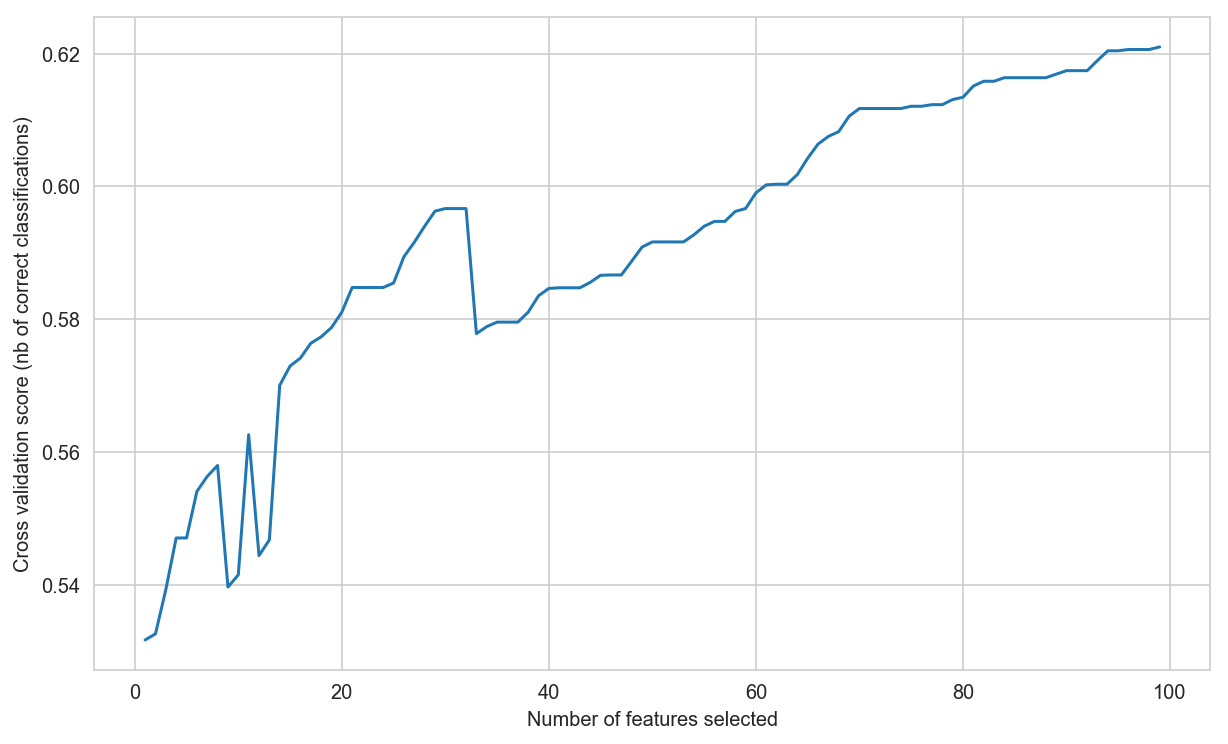

In [315]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=2, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train_me2.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

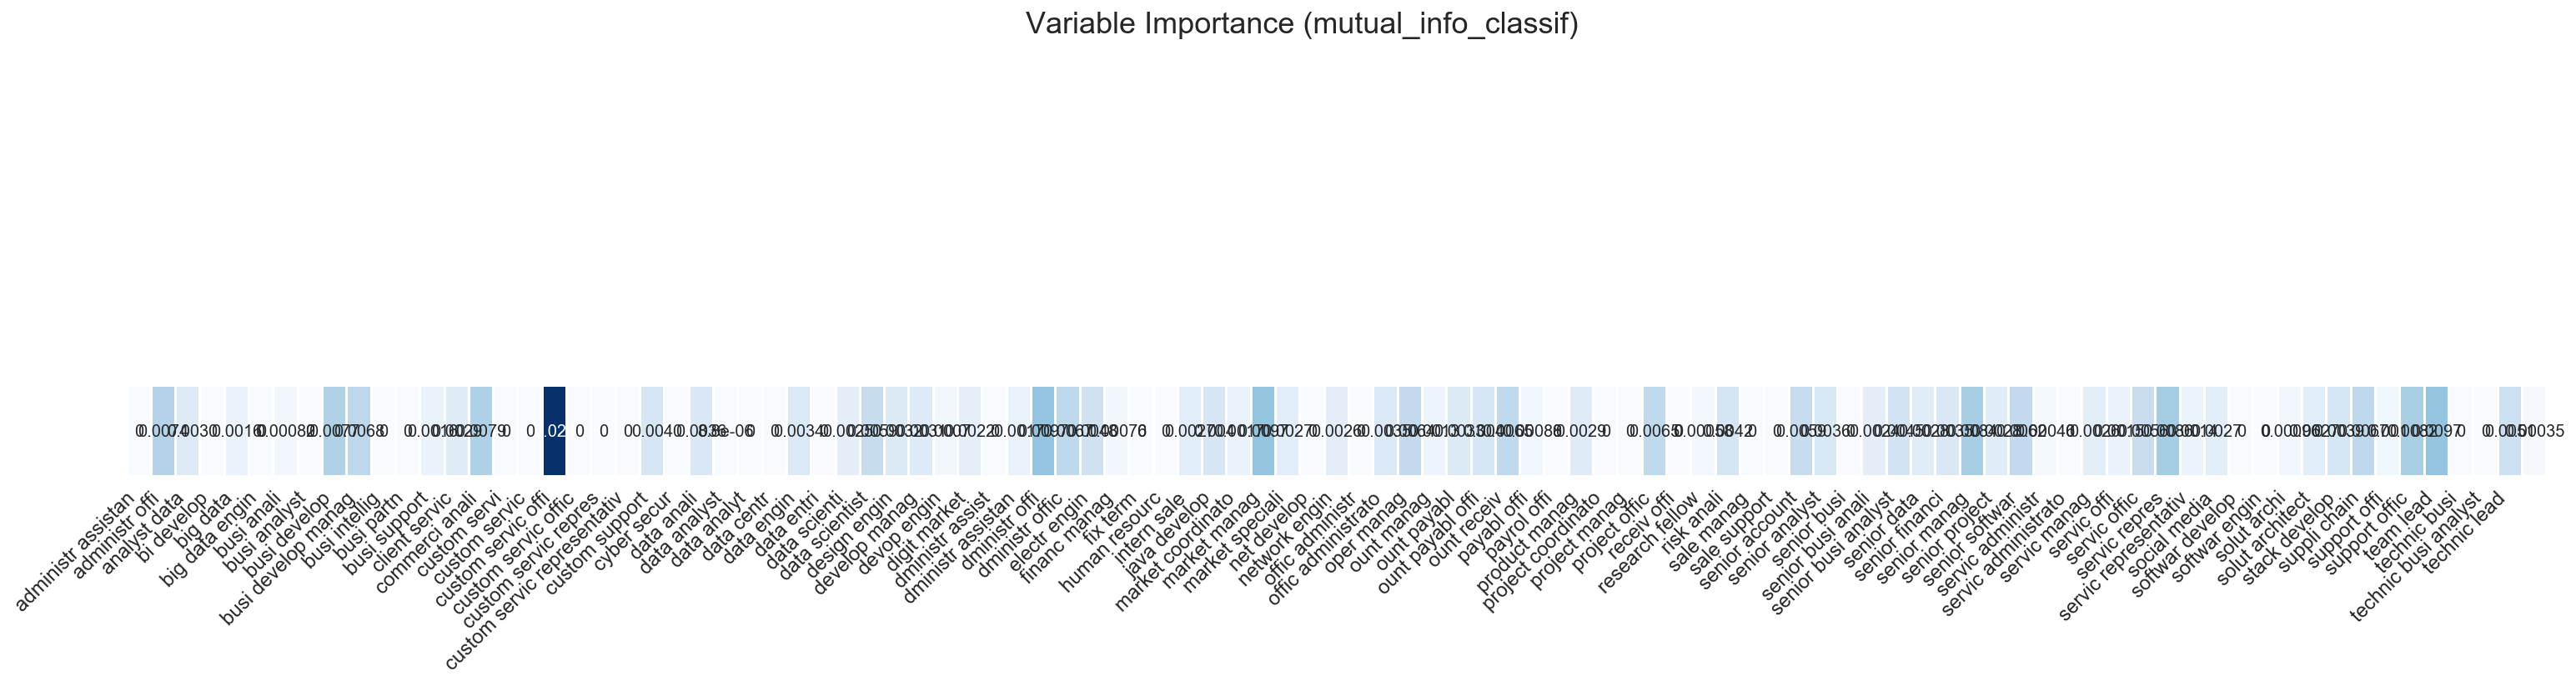

In [108]:
#https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn
from sklearn.feature_selection import mutual_info_classif
kepler_mutual_information = mutual_info_classif(X, y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns[1:], rotation=45, ha='right', fontsize=12)
plt.suptitle(" Variable Importance (mutual_info_classif)", fontsize=18, y=4)
plt.gcf().subplots_adjust(wspace=0.2)
pass

In [131]:
print("We started with {0} features but retained only {1} of them!".format(X.shape[1], kepler_X_trans.shape[1]))
from sklearn.feature_selection import GenericUnivariateSelect, chi2
trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
kepler_X_trans = trans.fit_transform(X, y)

We started with 99 features but retained only 49 of them!


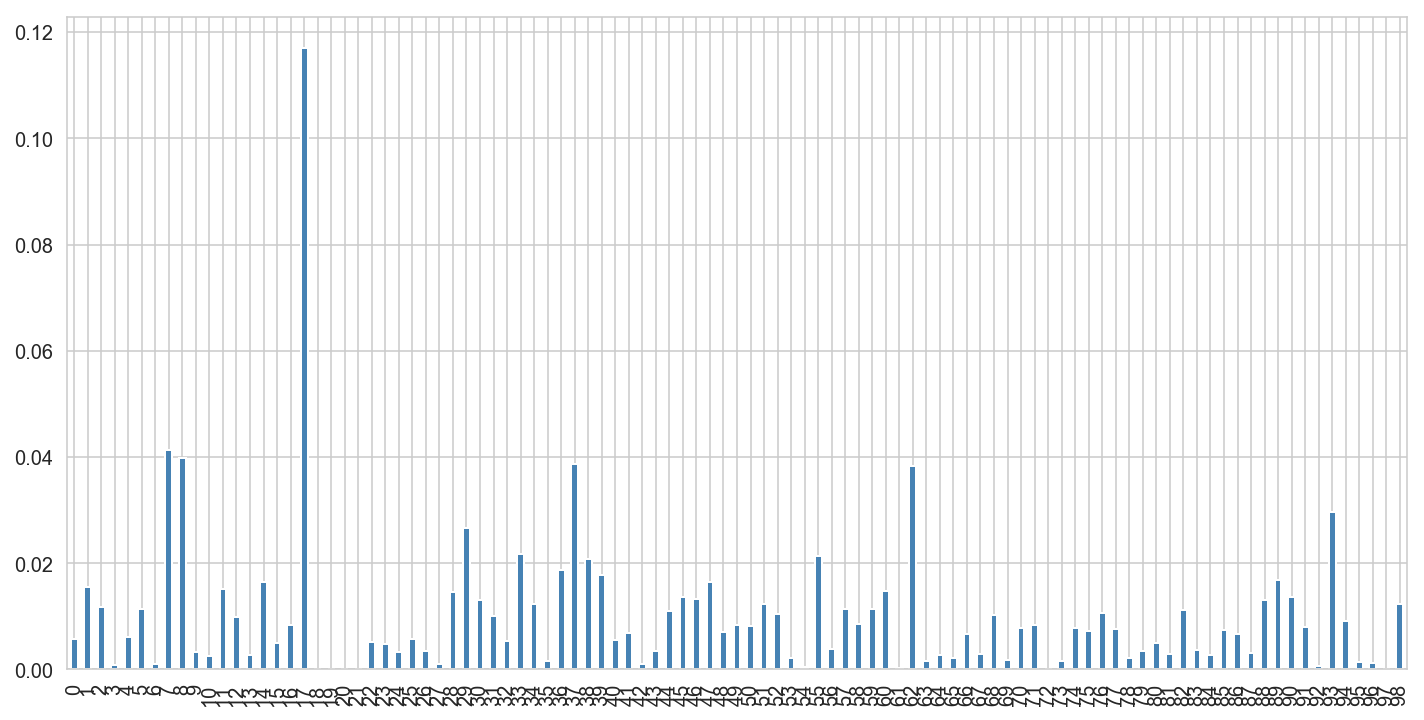

In [133]:
from sklearn.tree import DecisionTreeClassifier

clf = RandomForestClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_).plot.bar(color='steelblue', figsize=(12, 6))

In [116]:
X.shape

(20707, 99)

## Modelling preparation

In [134]:
#dropping column 
df_dummies_one=results.iloc[:,11:]
df_dummies_one.head(2)

,skill_sql,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,...,Pskill_LSQL,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [135]:
clean_data['stem_desc']=clean_data.description.apply(lambda x : stemming(x))

In [142]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)

#define x y
#X=X_dff.drop(['description'], axis=1)
#X_df = pd.concat([df_dummies_one, clean_data.stem_desc], axis=1)#pd.concat([df_dummies, clean_data.description], axis=1)
X_df=clean_data[['stem_desc']]
y=clean_data.salary_classification

#split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=1,train_size=0.7, stratify=y)

In [143]:
#TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=2800)
X_train_me = vect.fit_transform(X_train.stem_desc)
X_test_me = vect.transform(X_test.stem_desc)

train_count_vect_df = pd.DataFrame(X_train_me.todense(), columns=vect.get_feature_names())
test_count_vect_df = pd.DataFrame(X_test_me.todense(), columns=vect.get_feature_names())

X_train_me=pd.concat([X_train.drop('stem_desc',axis=1).reset_index(drop=True), train_count_vect_df], axis=1)
X_test_me=pd.concat([X_test.drop('stem_desc',axis=1).reset_index(drop=True), test_count_vect_df], axis=1)

In [144]:
print 'train_count_vect_df',train_count_vect_df.shape
print 'train_count_vect_df',test_count_vect_df.shape
print 'X_train_me',X_train_me.shape
print 'X_test_me',X_test_me.shape

train_count_vect_df (14494, 2800)
train_count_vect_df (6213, 2800)
X_train_me (14494, 2800)
X_test_me (6213, 2800)


<a id='Q1Salaryclassification'></a>
## Q 1 Salary classification
<a id='Q1.1CrossValidationwithdifferentmodels'></a>
#### Q 1.1 Cross Validation with different models

I will just go crazy trying best model for this case

In [40]:
# BASELINE ACCURACY
display(clean_data['salary_classification'].value_counts())
(clean_data['salary_classification'].value_counts(normalize=True)*100).max()

0.0    10360
1.0    10347
Name: salary_classification, dtype: int64

50.031390351089001

In [44]:
from sklearn.svm import SVC, SVR
#gridsearch tuning

#lasso and ridge
c_space = np.logspace(-5, 8, 15)
CV=2
models = [
    #Ridge(alpha=optimal_ridge.alpha_),
    BaggingClassifier(base_estimator = LogisticRegression(random_state=48), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='rbf'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='poly'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = GaussianNB(), max_samples=0.5, max_features=0.5),
    XGBClassifier( learning_rate =0.1, n_estimators=100,max_depth=5, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
    GridSearchCV(LogisticRegression(random_state=48) ,param_grid={'C': c_space},cv=CV),
    GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [10, 40, 80],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]},scoring='accuracy',cv=CV,n_jobs=-1),
    GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=CV,n_jobs=-1),
    LogisticRegression(random_state=48),
    BaggingClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(kernel='rbf'),
    SVC(kernel='poly'),
    GaussianNB(),
    KNeighborsClassifier()
    #Lasso(alpha=optimal_lasso.alpha_)
    
]
CV=2
entries = []
cv_d = pd.DataFrame(index=range(CV * len(models)))
for i,model in enumerate(models):
    
    indexes = np.argsort(y_test)
    model_name = model.__class__.__name__
    print('processing',model_name,i)
    accuracies = cross_val_score(model,X_train_me,y_train, cv=CV)
    R2_Cross_validated_scores =np.mean(accuracies)
    model.fit(X_train_me,y_train)
    y_pred=model.predict(X_test_me)
    train_score=model.score(X_train_me,y_train)
    test_score=model.score(X_test_me,y_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r,p = stats.pearsonr(y_test, y_pred)
    
    cv_ind = list(range(1,len(accuracies)+1))
    model_df = pd.DataFrame({'CV': cv_ind,'Accuracy': accuracies,'R2_Cross_validated_scores':R2_Cross_validated_scores,
                            'train_score':train_score,'test_score':test_score,
                           'RMSE':RMSE,'r2':r, 'pvalue':p})
    model_df['model_name'] = model_name
    model_df = model_df[['model_name','CV', 'Accuracy','train_score','test_score','RMSE','r2','pvalue']]
    
    if i == 0:
        cv_d = model_df
    else:
        cv_d = pd.concat([cv_d, model_df], axis = 0)

('processing', 'BaggingClassifier', 0)
('processing', 'BaggingClassifier', 1)
('processing', 'BaggingClassifier', 2)


/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


('processing', 'BaggingClassifier', 3)
('processing', 'XGBClassifier', 4)


/anaconda2/lib/python2.7/site-packages/xgboost/sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/xgboost/sklearn.py:207: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


('processing', 'GridSearchCV', 5)
('processing', 'GridSearchCV', 6)
('processing', 'GridSearchCV', 7)
('processing', 'LogisticRegression', 8)
('processing', 'BaggingClassifier', 9)
('processing', 'RandomForestClassifier', 10)
('processing', 'MultinomialNB', 11)
('processing', 'SVC', 12)
('processing', 'SVC', 13)
('processing', 'GaussianNB', 14)
('processing', 'KNeighborsClassifier', 15)


In [45]:
cv_d.sort_values('test_score', ascending=False).head(8)#cv_d.groupby(['model_name']).max()

,model_name,CV,Accuracy,train_score,test_score,RMSE,r2,pvalue
1,GridSearchCV,2,0.903684,0.998068,0.928698,0.267025,0.857406,0.0
0,GridSearchCV,1,0.905616,0.998068,0.928698,0.267025,0.857406,0.0
1,GridSearchCV,2,0.879812,0.997792,0.916144,0.289580,0.832324,0.0
0,GridSearchCV,1,0.888782,0.997792,0.916144,0.289580,0.832324,0.0
0,GridSearchCV,1,0.902856,0.946461,0.914212,0.292896,0.828957,0.0
1,GridSearchCV,2,0.899683,0.946461,0.914212,0.292896,0.828957,0.0
1,RandomForestClassifier,2,0.878570,0.994204,0.910510,0.299148,0.821551,0.0
0,RandomForestClassifier,1,0.883124,0.994204,0.910510,0.299148,0.821551,0.0


<a id='Q1.2Votingclassifier'></a>
#### Q 1.2 Voting classifier

In [217]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='soft')

accuracies = cross_val_score(clf,X_train_me,y_train, cv=2)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me,y_train)
y_pred=model.predict(X_test_me)
train_score=model.score(X_train_me,y_train)
test_score=model.score(X_test_me,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me, y_train)
clf.score(X_test_me, y_test)
y_pred = clf.predict(X_test_me)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me, y_train)
score_test= clf.score(X_test_me, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.90396025941769009)
('y_pred:', array([ 1.,  0.,  1., ...,  1.,  1.,  0.]))
('score_train:', 0.95970746515799643)
('score_test:', 0.91501690004828584)
('R2:', 0.83074261610595423)
('p:', 0.0)


In [218]:
#voting=hard
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='hard')

accuracies = cross_val_score(clf,X_train_me,y_train, cv=2)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me,y_train)
y_pred=model.predict(X_test_me)
train_score=model.score(X_train_me,y_train)
test_score=model.score(X_test_me,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me, y_train)
clf.score(X_test_me, y_test)
y_pred = clf.predict(X_test_me)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me, y_train)
score_test= clf.score(X_test_me, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.89913067476197051)
('y_pred:', array([ 1.,  0.,  1., ...,  1.,  1.,  0.]))
('score_train:', 0.95508486270180759)
('score_test:', 0.91034926766457425)
('R2:', 0.82083509517730058)
('p:', 0.0)


<a id='Q1.3Lassoandridge'></a>
#### Q 1.3 Lasso and ridge

In [212]:
#guideline
optimal_lasso = LassoCV(cv=4).fit(X_train_me,y_train)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso,X_train_me,y_train, cv=4)
print('Optimal alpha:',optimal_lasso.alpha_)
print('Mean lasso CV R2:',np.mean(lasso_scores))

lasso.fit(X_train_me,y_train)
y_pred=lasso.predict(X_test_me)
print('Lasso train score:',lasso.score(X_train_me,y_train))
print('Lasso test score:',lasso.score(X_test_me,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 3.9982557822307108e-05)
('Mean lasso CV R2:', 0.61915809322568705)
('Lasso train score:', 0.6829286636778602)
('Lasso test score:', 0.61716794954161247)
('RMSE:', 0.30936708018153541)


In [215]:
#guideline
optimal_Ridge = RidgeCV(cv=4).fit(X_train_me,y_train)

Ridge = Ridge(alpha=optimal_Ridge.alpha_)

Ridge_scores = cross_val_score(Ridge,X_train_me,y_train, cv=4)
print('Optimal alpha:',optimal_Ridge.alpha_)
print('Mean lasso CV R2:',np.mean(Ridge_scores))

Ridge.fit(X_train_me,y_train)
y_pred=Ridge.predict(X_test_me)
print('Lasso train score:',Ridge.score(X_train_me,y_train))
print('Lasso test score:',Ridge.score(X_test_me,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 1.0)
('Mean lasso CV R2:', 0.6195741896324507)
('Lasso train score:', 0.69885779717640972)
('Lasso test score:', 0.61905360225998174)
('RMSE:', 0.30860424046076773)


<a id='Q1.4Comparemodels'></a>
#### Q 1.4 Compare models

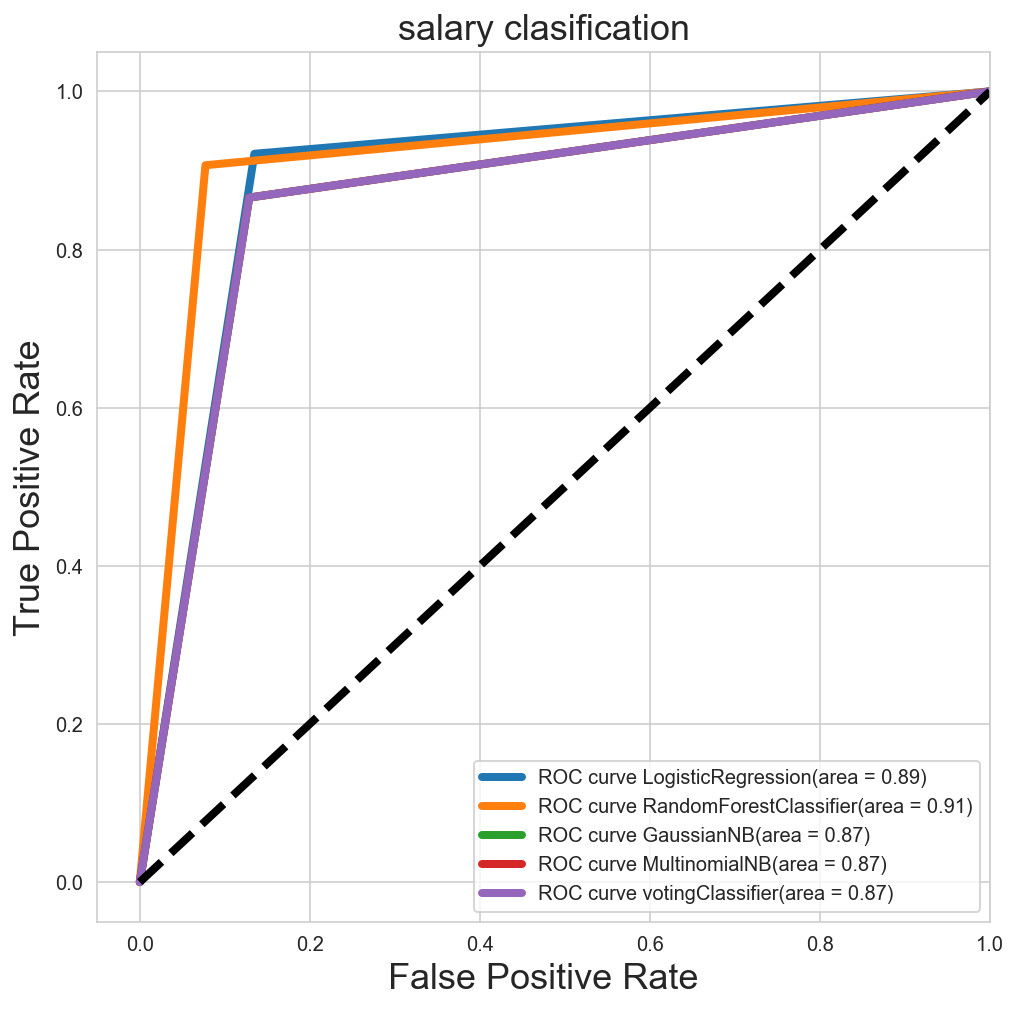

In [222]:
from sklearn.ensemble import VotingClassifier
#rfc =RandomForestClassifier()
SEED=48
#model
model = LogisticRegression(penalty='l1',random_state=48)
model_rfc=RandomForestClassifier()
model_xgb = XGBClassifier()
model_bn=GaussianNB()
model_grid=MultinomialNB()
model_bc=VotingClassifier([('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='hard')

#fitting model
model.fit(X_train_me, y_train)
model_rfc.fit(X_train_me, y_train)
model_bn.fit(X_train_me, y_train)
model_grid.fit(X_train_me, y_train)
model_bc.fit(X_train_me, y_train)

#ypred
y_pred = model.predict(X_test_me)
y_predmodel_rfc = model_rfc.predict(X_test_me)
y_predmodel_bn = model_bn.predict(X_test_me)
y_predmodel_grid = model_bn.predict(X_test_me)
y_predmodel_bc = model_bn.predict(X_test_me)

#plot
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
fprrfc, tprrfc, _ = roc_curve(y_test, y_predmodel_rfc)
fprbn, tprbn, _ = roc_curve(y_test, y_predmodel_bn)
fprgd, tprgd, _ = roc_curve(y_test, y_predmodel_grid)
fprbc, tprbc, _ = roc_curve(y_test, y_predmodel_bc)

#aucroc
roc_auc = auc(fpr, tpr)
roc_aucrfc = auc(fprrfc, tprrfc)
roc_aucbn = auc(fprbn, tprbn)
roc_aucgd = auc(fprgd, tprgd)
roc_aucbc = auc(fprbc, tprbc)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve LogisticRegression(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fprrfc, tprrfc, label='ROC curve RandomForestClassifier(area = %0.2f)' % roc_aucrfc, linewidth=4)
plt.plot(fprbn, tprbn, label='ROC curve GaussianNB(area = %0.2f)' % roc_aucbn, linewidth=4)
plt.plot(fprgd, tprgd, label='ROC curve MultinomialNB(area = %0.2f)' % roc_aucgd, linewidth=4)
plt.plot(fprbc, tprbc, label='ROC curve votingClassifier(area = %0.2f)' % roc_aucbc, linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('salary clasification', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#https://jakevdp.github.io/PythonDataScienceHandbook/index.html

<a id='Q1.5bestmodels'></a>
#### Q 1.5 best models

The reason i choose this model is beacuse it is better underpredict rather than lower predict

<a id='RandomForest'></a>
## Random Forest

('Accuracy is: ', 0.9111540318686625)


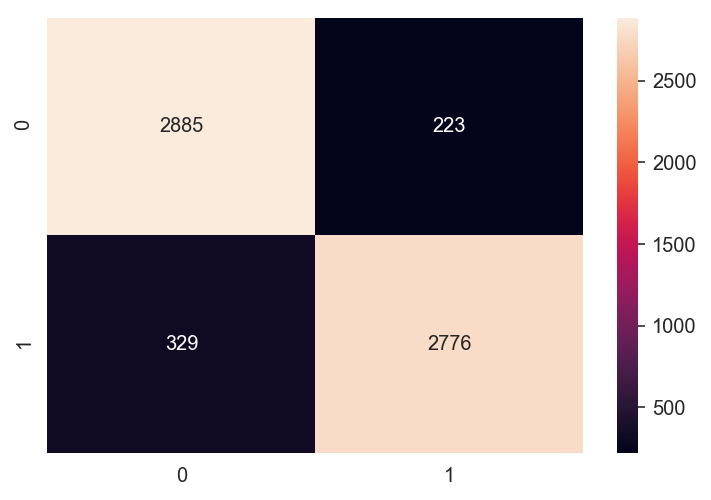

In [146]:
#y= all_job_clean.job_classname.values
#LogisticRegression
lr = RandomForestClassifier(random_state=48)      
lr = lr.fit(X_train_me,y_train)

ac = accuracy_score(y_test,lr.predict(X_test_me))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test_me))
sns.heatmap(cm,annot=True,fmt="d")

In [181]:
#TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=1788)
X_train_me = vect.fit_transform(X_train.stem_desc)
X_test_me = vect.transform(X_test.stem_desc)

train_count_vect_df = pd.DataFrame(X_train_me.todense(), columns=vect.get_feature_names())
test_count_vect_df = pd.DataFrame(X_test_me.todense(), columns=vect.get_feature_names())

X_train_me=pd.concat([X_train.drop('stem_desc',axis=1).reset_index(drop=True), train_count_vect_df], axis=1)
X_test_me=pd.concat([X_test.drop('stem_desc',axis=1).reset_index(drop=True), test_count_vect_df], axis=1)

X_train_tokens = vect.get_feature_names()

#train_count_vect_df=X_train_tokens

In [565]:
rfr=RandomForestClassifier()
rfr.fit(X_train_me,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [566]:
rfr_scores = cross_val_score(rfr, X_train_me, y_train, cv=4)
y_pred=rfr.predict(X_test_me)
r,p = stats.pearsonr(y_test, y_pred)
print('Mean random forest CV R2:',np.mean(rfr_scores))
print('Random forest train score:',rfr.score(X_train_me,y_train))
print('Random forest test score:',rfr.score(X_test_me,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));
print('R2:',r)
print('pvalue:',p)

('Mean random forest CV R2:', 0.89926862289554288)
('Random forest train score:', 0.99454946874568784)
('Random forest test score:', 0.9116368903911154)
('RMSE:', 0.29725933056656872)
('R2:', 0.82367272210610942)
('pvalue:', 0.0)


In [567]:
rfr=RandomForestClassifier()
y_pred=rfr.predict(X_test_me)
classifier_rfr=metrics.classification_report(y_test, y_pred)
print(classifier_rfr)

             precision    recall  f1-score   support

        0.0       0.90      0.93      0.91      3108
        1.0       0.92      0.90      0.91      3105

avg / total       0.91      0.91      0.91      6213



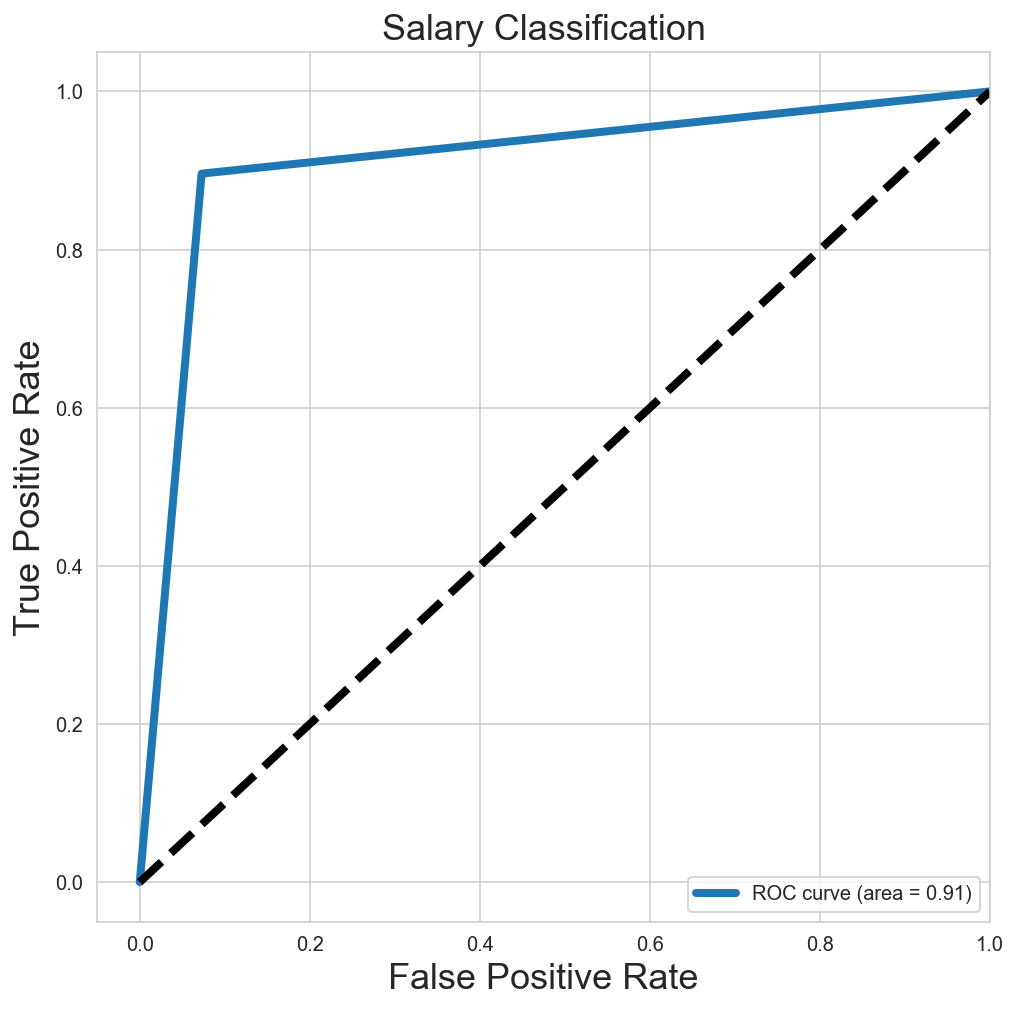

In [568]:
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#https://www.youtube.com/watch?v=85dtiMz9tSo

In [569]:
classifier = RandomForestClassifier()
classifier.fit(X_train_me, y_train)
classifier_cross = cross_val_score(classifier, X_train_me, y_train, cv=4)
print('CV score:',np.mean(classifier_cross));
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_test_me.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

('CV score:', 0.9007172031886056)


In [570]:
for pair in feature_importances[:-21]:
    print('factor: {:22} Importance: {}'.format(*pair))

factor: data entri             Importance: 0.08
factor: custom servic          Importance: 0.04
factor: abil work              Importance: 0.01
factor: account receiv         Importance: 0.01
factor: administr duti         Importance: 0.01
factor: administr support      Importance: 0.01
factor: commun skill           Importance: 0.01
factor: comput skill           Importance: 0.01
factor: custom servic skill    Importance: 0.01
factor: data analyt            Importance: 0.01
factor: duti includ            Importance: 0.01
factor: entri skill            Importance: 0.01
factor: gener administr        Importance: 0.01
factor: high attent            Importance: 0.01
factor: microsoft offic        Importance: 0.01
factor: monday friday          Importance: 0.01
factor: organis skill          Importance: 0.01
factor: tertiari qualif        Importance: 0.01
factor: skill_sql              Importance: 0.0
factor: skill_excel            Importance: 0.0
factor: skill_python           Importance:

factor: hardwar softwar        Importance: 0.0
factor: head offic             Importance: 0.0
factor: health amp             Importance: 0.0
factor: health care            Importance: 0.0
factor: health insur           Importance: 0.0
factor: health safeti          Importance: 0.0
factor: health servic          Importance: 0.0
factor: health wellb           Importance: 0.0
factor: hear pleas             Importance: 0.0
factor: help achiev            Importance: 0.0
factor: help achiev busi       Importance: 0.0
factor: help build             Importance: 0.0
factor: help client            Importance: 0.0
factor: help custom            Importance: 0.0
factor: help desir             Importance: 0.0
factor: help desir succeed     Importance: 0.0
factor: help drive             Importance: 0.0
factor: help peopl             Importance: 0.0
factor: high degre             Importance: 0.0
factor: high level             Importance: 0.0
factor: high level accuraci    Importance: 0.0
factor: high 

factor: stakehold includ       Importance: 0.0
factor: stakehold level        Importance: 0.0
factor: stakehold manag        Importance: 0.0
factor: stakehold manag skill  Importance: 0.0
factor: stakehold relationship Importance: 0.0
factor: start asap             Importance: 0.0
factor: start career           Importance: 0.0
factor: start immedi           Importance: 0.0
factor: state art              Importance: 0.0
factor: state govern           Importance: 0.0
factor: statu disabl           Importance: 0.0
factor: statu quo              Importance: 0.0
factor: step career            Importance: 0.0
factor: stock control          Importance: 0.0
factor: strait island          Importance: 0.0
factor: strait island peopl    Importance: 0.0
factor: strateg plan           Importance: 0.0
factor: strategi develop       Importance: 0.0
factor: strategi plan          Importance: 0.0
factor: strong abil            Importance: 0.0
factor: strong administr       Importance: 0.0
factor: stron

In [163]:
model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train_me, y_train)
print (model.oob_score_)
cv_model = cross_val_score(model, X_train_me, y_train, cv=6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()
importance_dataframe_big = pd.DataFrame(model.feature_importances_, index = X_train_me.columns, columns=['importance']).sort_values('importance', ascending=False)
importance_dataframe_big.head(20)

0.925210431903
Cross-validated scores: [ 0.92384106  0.91514901  0.92880795  0.91804636  0.9184265   0.90890269]
Average score: 0.918862260568
Standard deviation of score: 0.00629208462384


,importance
data entri,0.079113
custom servic,0.030540
administr support,0.014776
microsoft offic,0.010681
administr duti,0.009002
time manag,0.008941
comput skill,0.008624
duti includ,0.008174
gener administr,0.007980
monday friday,0.006815


<a id='selectkbest'></a>
## Select kbest

In [153]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
X=X_df.apply(LabelEncoder().fit_transform)

cols = list(X_train_me.columns)
# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_train_me,y_train)
skb_chi2.fit(X_train_me,y_train)

# examine results
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.sort_values('f_classif', ascending=False).head(21)

#accuracies = cross_val_score(model,X_train_me,y_train, cv=CV)

,feature,f_classif,chi2 score
625,data entri,3680.21,266.746
593,custom servic,1872.41,216.335
2611,time manag,804.965,64.2959
82,administr support,710.463,89.669
462,commun skill,605.774,24.4324
1514,microsoft offic,576.097,52.3758
500,comput skill,544.218,59.8367
1064,gener administr,534.869,66.7713
74,administr duti,533.599,69.1546
790,duti includ,504.341,57.2521


## Modelling preparation

In [160]:
df_dummies2=all_job_clean.iloc[:,5:-2]
df_dummies2.head(2)

,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,skill_Ruby,...,Pskill_LSQL,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [212]:
print(df_dummies2.shape)
all_job_clean['stem_job']=all_job_clean.description.apply(lambda x : stemming(x))

(1454, 37)


In [213]:
df_dummies2.head(2)

,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,skill_Ruby,...,Pskill_LSQL,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('data analyst')
custom_stop_words.append('data scientist')
custom_stop_words.append('offer opportun')
custom_stop_words.append('hesit appli')
custom_stop_words.append('brand new')

#define x y

#X = all_job_clean.iloc[:,4:-2]
X_df2 = all_job_clean[['stem_job']]#pd.concat([df_dummies, clean_data.description], axis=1)
y=all_job_clean.job_class
#X_df2 = pd.concat([df_dummies2, all_job_clean.stem_job], axis=1)#pd.concat([df_dummies, clean_data.description], axis=1)


#split
X_train, X_test, y_train, y_test = train_test_split(X_df2, y, random_state=1,train_size=0.7, stratify=y)

In [215]:
custom_stop_words;

In [227]:
#TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=888)
X_train_me1 = vect.fit_transform(X_train.stem_job)
X_test_me1 = vect.transform(X_test.stem_job)

train_count_vect_df1 = pd.DataFrame(X_train_me1.todense(), columns=vect.get_feature_names())
test_count_vect_df1 = pd.DataFrame(X_test_me1.todense(), columns=vect.get_feature_names())

X_train_me1=pd.concat([X_train.drop('stem_job',axis=1).reset_index(drop=True), train_count_vect_df1], axis=1)
X_test_me1=pd.concat([X_test.drop('stem_job',axis=1).reset_index(drop=True), test_count_vect_df1], axis=1)

<a id='Q2Identifyjobbardescription'></a>
## Q 2 Identify job bar description
<a id='Q2.1CrossValidationwithdifferentmodels'></a>
#### Q 2.1 Cross Validation with different models

In [375]:
# BASELINE ACCURACY
all_job_clean.job_class.value_counts()/len(all_job_clean.job_class)

5    0.422971
3    0.256534
1    0.223521
2    0.052957
4    0.044017
Name: job_class, dtype: float64

In [242]:
from sklearn.svm import SVC, SVR
c_space = np.logspace(-5, 8, 15)
CV=2
models = [
    #Ridge(alpha=optimal_ridge.alpha_),
    BaggingClassifier(base_estimator = LogisticRegression(random_state=48), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='rbf'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='poly'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = GaussianNB(), max_samples=0.5, max_features=0.5),
    XGBClassifier( learning_rate =0.1, n_estimators=100,max_depth=5, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
    GridSearchCV(LogisticRegression(random_state=48) ,param_grid={'C': c_space},cv=CV),
    GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [10, 40, 80],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]},scoring='accuracy',cv=CV,n_jobs=-1),
    GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=CV,n_jobs=-1),
    LogisticRegression(random_state=48),
    BaggingClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    SVC(kernel='rbf'),
    SVC(kernel='poly'),
    GaussianNB(),
    KNeighborsClassifier()
    #Lasso(alpha=optimal_lasso.alpha_)
    
]
entries = []
cv_d = pd.DataFrame(index=range(CV * len(models)))
for i,model in enumerate(models):
    indexes = np.argsort(y_test)
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,X_train_me1,y_train, cv=CV)
    print('processing',model_name,i)
    R2_Cross_validated_scores =np.mean(accuracies)
    model.fit(X_train_me1,y_train)
    y_pred=model.predict(X_test_me1)
    train_score=model.score(X_train_me1,y_train)
    test_score=model.score(X_test_me1,y_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r,p = stats.pearsonr(y_test, y_pred)
    
    cv_ind = list(range(1,len(accuracies)+1))
    model_df = pd.DataFrame({'CV': cv_ind,'Accuracy': accuracies,'R2_Cross_validated_scores':R2_Cross_validated_scores,
                            'train_score':train_score,'test_score':test_score,
                           'RMSE':RMSE,'r2':r, 'pvalue':p})
    model_df['model_name'] = model_name
    model_df = model_df[['model_name','CV', 'Accuracy','train_score','test_score','RMSE','r2','pvalue']]
    
    if i == 0:
        cv_d = model_df
    else:
        cv_d = pd.concat([cv_d, model_df], axis = 0)

('processing', 'BaggingClassifier', 0)
('processing', 'BaggingClassifier', 1)


/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


('processing', 'BaggingClassifier', 2)
('processing', 'BaggingClassifier', 3)


/anaconda2/lib/python2.7/site-packages/xgboost/sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/xgboost/sklearn.py:207: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


('processing', 'XGBClassifier', 4)
('processing', 'GridSearchCV', 5)
('processing', 'GridSearchCV', 6)
('processing', 'GridSearchCV', 7)
('processing', 'LogisticRegression', 8)
('processing', 'BaggingClassifier', 9)
('processing', 'RandomForestClassifier', 10)
('processing', 'MultinomialNB', 11)
('processing', 'SVC', 12)
('processing', 'SVC', 13)
('processing', 'GaussianNB', 14)
('processing', 'KNeighborsClassifier', 15)


In [244]:
cv_d.sort_values('test_score', ascending=False).head(21)#cv_d.groupby(['model_name']).max()

,model_name,CV,Accuracy,train_score,test_score,RMSE,r2,pvalue
0,GridSearchCV,1,0.823529,0.988201,0.881007,0.736433,0.894077,7.941949e-154
1,GridSearchCV,2,0.863905,0.988201,0.881007,0.736433,0.894077,7.941949e-154
1,GridSearchCV,2,0.881657,0.988201,0.869565,0.857061,0.855204,3.089887e-126
0,GridSearchCV,1,0.831373,0.988201,0.869565,0.857061,0.855204,3.089887e-126
1,XGBClassifier,2,0.885602,0.986234,0.846682,0.938620,0.829016,7.301135e-112
0,XGBClassifier,1,0.805882,0.986234,0.846682,0.938620,0.829016,7.301135e-112
0,BaggingClassifier,1,0.786275,0.977384,0.839817,0.917663,0.835997,1.914426e-115
1,GridSearchCV,2,0.879684,0.984267,0.839817,0.908893,0.836851,6.796822e-116
0,GridSearchCV,1,0.801961,0.984267,0.839817,0.908893,0.836851,6.796822e-116
1,BaggingClassifier,2,0.883629,0.977384,0.839817,0.917663,0.835997,1.914426e-115


<a id='Q2.2Votingclassifier'></a>
#### Q 2.2 Voting classifier

In [397]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('svc',SVC(C=100, probability=True)),
                         ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('knn',neighbors.KNeighborsClassifier()),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='soft')

accuracies = cross_val_score(clf,X_train_me1,y_train, cv=CV)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me1,y_train)
y_pred=model.predict(X_test_me1)
train_score=model.score(X_train_me1,y_train)
test_score=model.score(X_test_me1,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me1, y_train)
clf.score(X_test_me1, y_test)
y_pred = clf.predict(X_test_me1)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me1, y_train)
score_test= clf.score(X_test_me1, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
#print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.91314139772463432)
('score_train:', 0.98807495741056217)
('score_test:', 0.91666666666666663)
('R2:', 0.93019018570605583)
('p:', 8.3804870293285874e-111)


In [398]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('svc',SVC(C=100, probability=True)),
                         ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('knn',neighbors.KNeighborsClassifier()),
                        ('nb',GaussianNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='hard')

accuracies = cross_val_score(clf,X_train_me1,y_train, cv=CV)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train_me1,y_train)
y_pred=model.predict(X_test_me1)
train_score=model.score(X_train_me1,y_train)
test_score=model.score(X_test_me1,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train_me1, y_train)
clf.score(X_test_me1, y_test)
y_pred = clf.predict(X_test_me1)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train_me1, y_train)
score_test= clf.score(X_test_me1, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
#print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.87737404225679128)
('score_train:', 0.989778534923339)
('score_test:', 0.88492063492063489)
('R2:', 0.88929557929426062)
('p:', 6.4735728113868949e-87)


<a id='Q2.3Lassoandridge'></a>
#### Q 2.3 Lasso and ridge

In [280]:
#guideline
optimal_lasso = LassoCV(cv=4).fit(X_train_me1,y_train)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso,X_train_me1,y_train, cv=4)
print('Optimal alpha:',optimal_lasso.alpha_)
print('Mean lasso CV R2:',np.mean(lasso_scores))

lasso.fit(X_train_me1,y_train)
y_pred=lasso.predict(X_test_me1)
print('Lasso train score:',lasso.score(X_train_me1,y_train))
print('Lasso test score:',lasso.score(X_test_me1,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 0.00044858398105280259)
('Mean lasso CV R2:', 0.73531815913348919)
('Lasso train score:', 0.91760708421437509)
('Lasso test score:', 0.77068118023634535)
('RMSE:', 0.76247041641331481)


<a id='Q2.4Comparemodel'></a>
#### Q 2.4 Compare model

('Accuracy is: ', 0.74370709382151035)


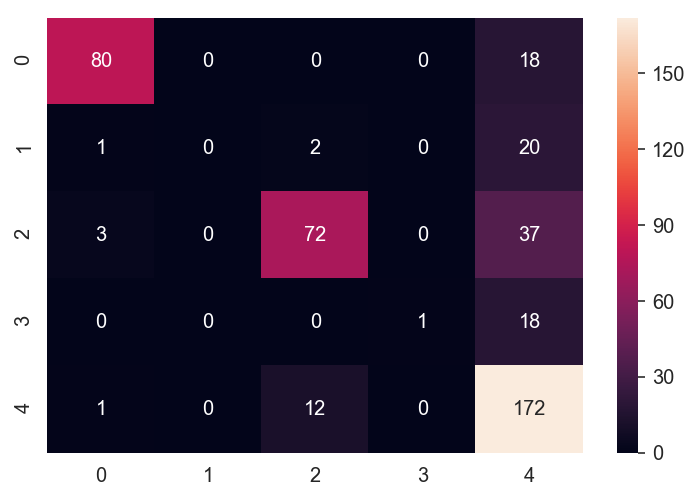

In [88]:
y= all_job_clean.job_classname.values
lr =  BaggingClassifier(base_estimator = LogisticRegression(random_state=48), max_samples=0.5, max_features=0.5)
lr = lr.fit(X_train_me1,y_train)

ac = accuracy_score(y_test,lr.predict(X_test_me1))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test_me1))
sns.heatmap(cm,annot=True,fmt="d")

('Accuracy is: ', 0.86498855835240274)


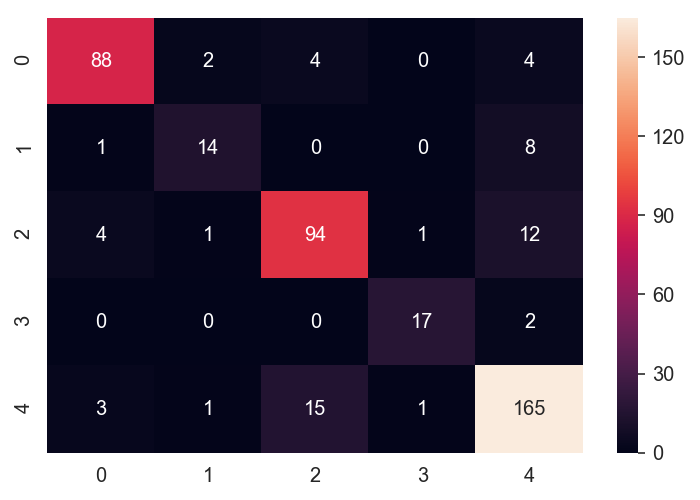

In [89]:
y= all_job_clean.job_classname.values
lr =  XGBClassifier( learning_rate =0.1, n_estimators=100,max_depth=5, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
lr = lr.fit(X_train_me1,y_train)

ac = accuracy_score(y_test,lr.predict(X_test_me1))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test_me1))
sns.heatmap(cm,annot=True,fmt="d")

<a id='Q2.5Bestmodel'></a>
#### Q 2.5 Best model

<a id='logisticregression'></a>
## logistic regression

('Accuracy is: ', 0.8443935926773455)


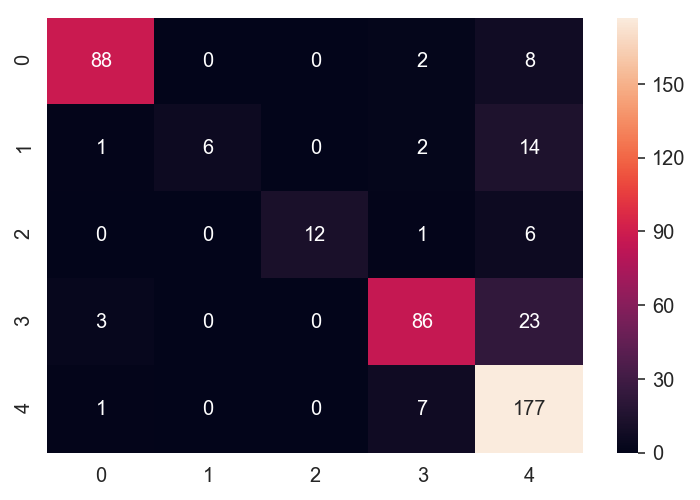

In [228]:
y= all_job_clean.job_classname.values
lr =  LogisticRegression(random_state=48)
lr = lr.fit(X_train_me1,y_train)
ac = accuracy_score(y_test,lr.predict(X_test_me1))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test_me1))
sns.heatmap(cm,annot=True,fmt="d")

In [276]:
#Apply penalty and refit the model
#logr = LogisticRegression()
#logr.fit(X_train_me1, y_train);
y=all_job_clean.job_classname

#split
X_train, X_test, y_train, y_test = train_test_split(X_df2, y, random_state=1,train_size=0.7, stratify=y)
logr_v1 = LogisticRegression()
logr= LogisticRegression()
logr_v1.fit(X_train_me1, y_train)
logr.fit(X_train_me1, y_train)
logr_v1_cross = cross_val_score(logr_v1, X_train_me1, y_train, cv=2)
print('logistic regression CV score:',np.mean(logr_v1_cross));

('logistic regression CV score:', 0.7788084464555052)


In [277]:
y_pred=logr_v1.predict(X_test_me1)
logr_score_v1=metrics.classification_report(y_test, y_pred)
print(lrcross)

                 precision    recall  f1-score   support

BusinessAnalyst       0.95      0.90      0.92        98
    DataAnalyst       1.00      0.26      0.41        23
  DataScientist       1.00      0.63      0.77        19
      Developer       0.88      0.77      0.82       112
       Engineer       0.78      0.96      0.86       185

      micro avg       0.84      0.84      0.84       437
      macro avg       0.92      0.70      0.76       437
   weighted avg       0.86      0.84      0.83       437



____________________________________

BusinessAnalyst
AxesSubplot(0.125,0.125;0.775x0.755)
____________________________________

DataAnalyst
AxesSubplot(0.125,0.125;0.775x0.755)
____________________________________

DataScientist
AxesSubplot(0.125,0.125;0.775x0.755)
____________________________________

Developer
AxesSubplot(0.125,0.125;0.775x0.755)
____________________________________

Engineer
AxesSubplot(0.125,0.125;0.775x0.755)


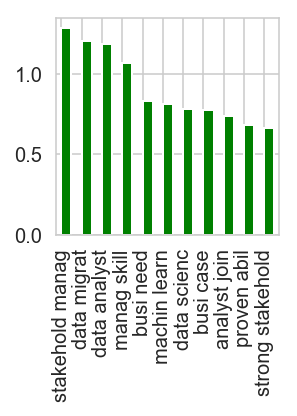

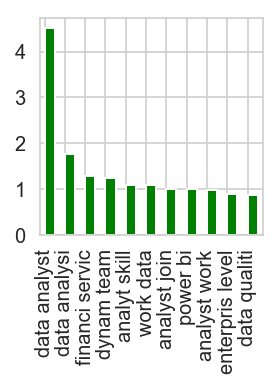

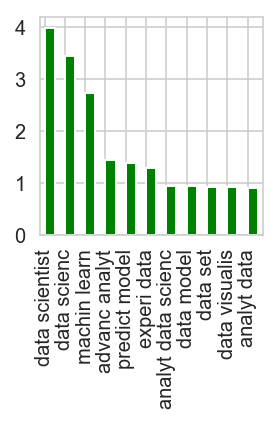

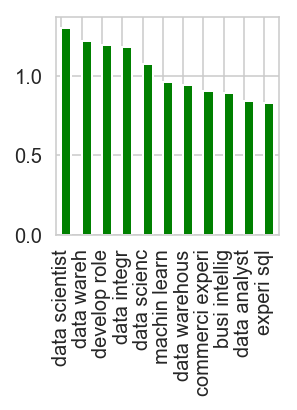

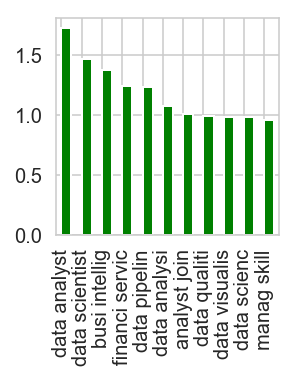

In [286]:
#Creating a dataframe matching logg odds with classes
logr_coefs = pd.DataFrame(columns=X_train_me1.columns,data=logr_v1.coef_,index=logr_v1.classes_)

#Because I am using Lasso penalty, there will be some coefs with a value of 0, this will remove them
logr_coefs=logr_coefs.T.loc[(logr_coefs.apply(sum)>0)].T

#Printing the top 8 values in terms of coef for each class 
for i,e in enumerate(logr.classes_):
    print('____________________________________\n')
    plt.figure()
    print(e)
    print(np.abs(logr_coefs.iloc[i,:]).sort_values(ascending=False).head(11)).plot.bar(color='green', figsize=(2, 2), align='edge')


<a id='Resultperjobtitle'></a>
## Result per job title

('job title:', 'BusinessAnalyst', '\n')
Top 5 positive coefs
AxesSubplot(0.125,0.125;0.775x0.755)

Top 5 negative coefs
AxesSubplot(0.125,0.125;0.775x0.755)
___________________________________



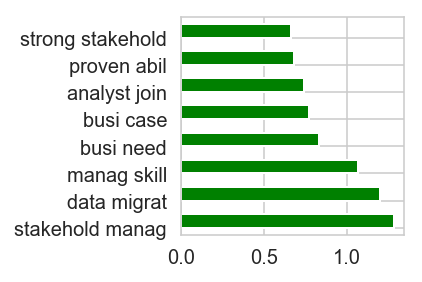

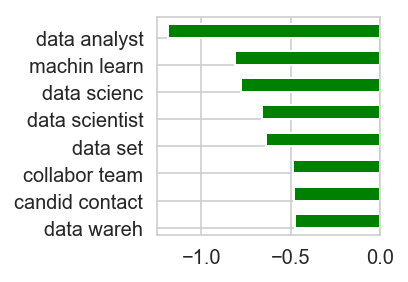

In [268]:
logr_v3 = LogisticRegression(penalty='l1', solver='saga')
logr_v3.fit(X_train_me1, y_train);

for i,e in enumerate(logr_v3.classes_):
    if i ==0:
        print('job title:',e,'\n')
        print('Top 5 positive coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('\nTop 5 negative coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('___________________________________\n')

('job title:', 'DataAnalyst', '\n')
Top 5 positive coefs
AxesSubplot(0.125,0.125;0.775x0.755)

Top 5 negative coefs
AxesSubplot(0.125,0.125;0.775x0.755)
___________________________________



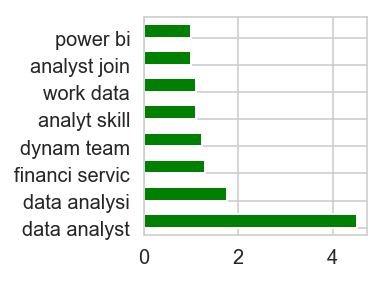

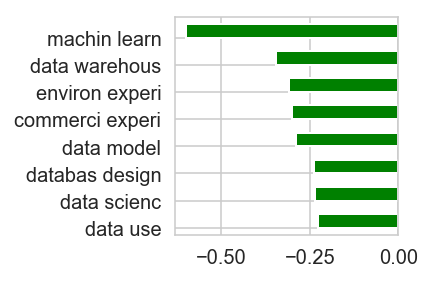

In [269]:
logr_v3 = LogisticRegression(penalty='l1', solver='saga')
logr_v3.fit(X_train_me1, y_train);

for i,e in enumerate(logr_v3.classes_):
    if i ==1:
        print('job title:',e,'\n')
        print('Top 5 positive coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('\nTop 5 negative coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('___________________________________\n')

('job title:', 'DataScientist', '\n')
Top 5 positive coefs
AxesSubplot(0.125,0.125;0.775x0.755)

Top 5 negative coefs
AxesSubplot(0.125,0.125;0.775x0.755)
___________________________________



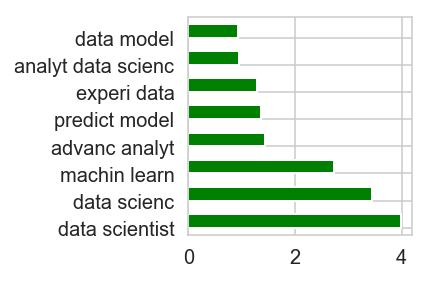

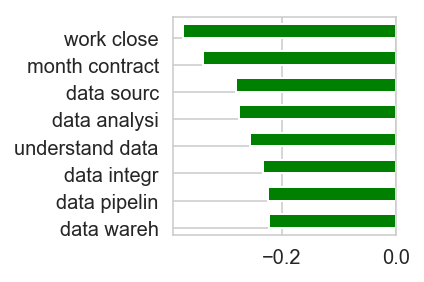

In [280]:
logr_v3 = LogisticRegression(penalty='l1', solver='saga')
logr_v3.fit(X_train_me1, y_train);

for i,e in enumerate(logr_v3.classes_):
    if i ==2:
        print('job title:',e,'\n')
        print('Top 5 positive coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('\nTop 5 negative coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('___________________________________\n')

('job title:', 'Developer', '\n')
Top 5 positive coefs
AxesSubplot(0.125,0.125;0.775x0.755)

Top 5 negative coefs
AxesSubplot(0.125,0.125;0.775x0.755)
___________________________________



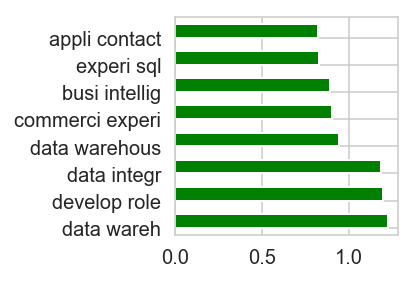

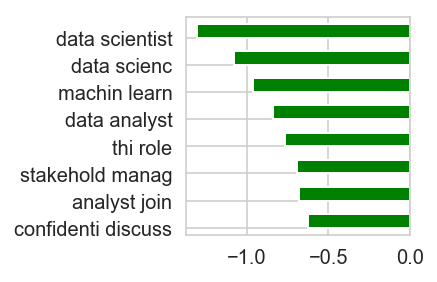

In [281]:
logr_v3 = LogisticRegression(penalty='l1', solver='saga')
logr_v3.fit(X_train_me1, y_train);

for i,e in enumerate(logr_v3.classes_):
    if i ==3:
        print('job title:',e,'\n')
        print('Top 5 positive coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('\nTop 5 negative coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('___________________________________\n')

('job title:', 'Engineer', '\n')
Top 5 positive coefs
AxesSubplot(0.125,0.125;0.775x0.755)

Top 5 negative coefs
AxesSubplot(0.125,0.125;0.775x0.755)
___________________________________



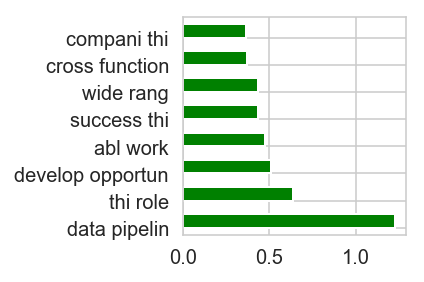

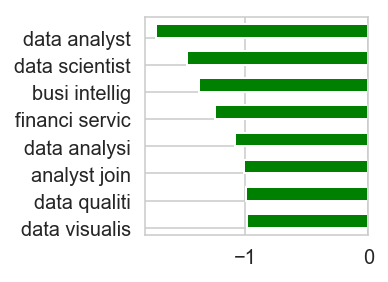

In [282]:
logr_v3 = LogisticRegression(penalty='l1', solver='saga')
logr_v3.fit(X_train_me1, y_train);

for i,e in enumerate(logr_v3.classes_):
    if i ==4:
        print('job title:',e,'\n')
        print('Top 5 positive coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('\nTop 5 negative coefs')
        plt.figure()
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(8)).plot.barh(color='green', figsize=(2, 2), align='edge')
        print('___________________________________\n')

## Modelling preparation

In [288]:
dummy=results.copy()

#all_jobtitle=dummy.drop(['stem_desc','job_title','date_posted','description','sub_category1','sub_category2','job_type','suburb','upper','region','salary_classification','company'], axis=1)
all_jobtitle=dummy.drop(['job_title','date_posted','description','sub_category1','sub_category2','job_type','suburb','upper','region','salary_classification','company'], axis=1)


all_jobtitle.head(2)
#clean_data['job_title']=clean_data.description.apply(lambda x : stemming(x))

,skill_sql,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,...,Pskill_LSQL,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
all_job.shape
all_job.job_classname;

In [290]:
custom_stop_words = list(ENGLISH_STOP_WORDS)
#define x y
#X = all_job_clean.iloc[:,4:-2]
#X_df3 =all_job_clean.drop(['job_class','job_classname','stem_job','salary_classification','job_type','sub_category1','description','stem_desc'], axis=1)
X_df3 =all_job_clean.drop(['stem_job','job_class','job_classname','salary_classification','job_type','sub_category1','description'], axis=1)


y=all_job.job_class

#split
X_train, X_test, y_train, y_test = train_test_split(X_df3, y, random_state=1,train_size=0.7, stratify=y)

In [291]:
X_train.head()

,skill_sql,skill_excel,skill_python,skill_tableau,skill_spark,skill_aws,skill_hadoop,skill_sas,skill_java,skill_PHP,...,Pskill_LSQL,State_Victoria,State_Queensland,State_New_South_Wales,State_Western_Australia,State_Australian_Capital_Territory,State_South_Australia,State_State_Northern_Territory,State_Tasmania,State_None
13365,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18711,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14700,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13305,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<a id='Q3Predictionskillsandstate'></a>
## Q 3 Prediction skills and state
<a id='Q3.1CrossValidationwithdifferentmodels'></a>
#### Q 3.1 Cross Validation with different models

In [531]:
# BASELINE ACCURACY
display(all_job['job_classname'].value_counts())
(all_job['job_classname'].value_counts(normalize=True)*100).max()

Engineer           615
Developer          373
BusinessAnalyst    325
DataAnalyst         77
DataScientist       64
Name: job_classname, dtype: int64

42.297111416781291

In [532]:
#TfidfVectorizer
#vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=1788)
#X_train_me1 = vect.fit_transform(X_train)
#X_test_me1 = vect.transform(X_test)

#train_count_vect_df1 = pd.DataFrame(X_train_me1.todense(), columns=vect.get_feature_names())
#test_count_vect_df1 = pd.DataFrame(X_test_me1.todense(), columns=vect.get_feature_names())

#X_train_me1=pd.concat([X_train.drop('job_title',axis=1).reset_index(drop=True), train_count_vect_df1], axis=1)
#X_test_me1=pd.concat([X_test.drop('job_title',axis=1).reset_index(drop=True), test_count_vect_df1], axis=1)

In [545]:
from sklearn.svm import SVC, SVR

models = [
    #Ridge(alpha=optimal_ridge.alpha_),
    BaggingClassifier(base_estimator = LogisticRegression(random_state=48), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='rbf'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = SVC(kernel='poly'), max_samples=0.5, max_features=0.5),
    BaggingClassifier(base_estimator = GaussianNB(), max_samples=0.5, max_features=0.5),
    XGBClassifier( learning_rate =0.1, n_estimators=100,max_depth=5, min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
    GridSearchCV(LogisticRegression(random_state=48) ,param_grid={'C': c_space},cv=CV),
    GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [10, 40, 80],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]},scoring='accuracy',cv=CV,n_jobs=-1),
    GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=CV,n_jobs=-1),
    LogisticRegression(random_state=48),
    BaggingClassifier(),
    RandomForestClassifier(),
    BernoulliNB(),
    SVC(kernel='rbf'),
    SVC(kernel='poly'),
    GaussianNB(),
    KNeighborsClassifier()
    #Lasso(alpha=optimal_lasso.alpha_)
    
]
CV=2
entries = []
cv_d = pd.DataFrame(index=range(CV * len(models)))
for i,model in enumerate(models):
    print('processing',model_name,i)
    indexes = np.argsort(y_test)
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,X_train,y_train, cv=CV)
    R2_Cross_validated_scores =np.mean(accuracies)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r,p = stats.pearsonr(y_test, y_pred)
    
    cv_ind = list(range(1,len(accuracies)+1))
    model_df = pd.DataFrame({'CV': cv_ind,'Accuracy': accuracies,'R2_Cross_validated_scores':R2_Cross_validated_scores,
                            'train_score':train_score,'test_score':test_score,
                           'RMSE':RMSE,'r2':r, 'pvalue':p})
    model_df['model_name'] = model_name
    model_df = model_df[['model_name','CV', 'Accuracy','train_score','test_score','RMSE','r2','pvalue']]
    
    if i == 0:
        cv_d = model_df
    else:
        cv_d = pd.concat([cv_d, model_df], axis = 0)

('processing', 'XGBClassifier', 0)
('processing', 'BaggingClassifier', 1)
('processing', 'BaggingClassifier', 2)
('processing', 'BaggingClassifier', 3)
('processing', 'BaggingClassifier', 4)
('processing', 'XGBClassifier', 5)
('processing', 'GridSearchCV', 6)
('processing', 'GridSearchCV', 7)
('processing', 'GridSearchCV', 8)
('processing', 'LogisticRegression', 9)
('processing', 'BaggingClassifier', 10)
('processing', 'RandomForestClassifier', 11)
('processing', 'BernoulliNB', 12)
('processing', 'SVC', 13)
('processing', 'SVC', 14)
('processing', 'GaussianNB', 15)


In [534]:
cv_d.sort_values('test_score', ascending=False).head(8)#cv_d.groupby(['model_name']).max()

,model_name,CV,Accuracy,train_score,test_score,RMSE,r2,pvalue
0,GridSearchCV,1,0.450980,0.563422,0.508009,2.109150,0.171321,0.000321
1,GridSearchCV,2,0.485207,0.563422,0.508009,2.109150,0.171321,0.000321
1,RandomForestClassifier,2,0.475345,0.562439,0.501144,2.115649,0.160227,0.000775
0,RandomForestClassifier,1,0.454902,0.562439,0.501144,2.115649,0.160227,0.000775
0,GridSearchCV,1,0.449020,0.563422,0.496568,2.069723,0.164795,0.000543
1,GridSearchCV,2,0.489152,0.563422,0.496568,2.069723,0.164795,0.000543
1,BernoulliNB,2,0.471400,0.505408,0.494279,2.138778,0.116884,0.014493
0,BernoulliNB,1,0.449020,0.505408,0.494279,2.138778,0.116884,0.014493


<a id='Q3.2Votingclassifier'></a>
#### Q 3.2 Voting classifier

In [535]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('svc',SVC(C=100, probability=True)),
                         ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('knn',neighbors.KNeighborsClassifier()),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='soft')

accuracies = cross_val_score(clf,X_train,y_train, cv=CV)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train, y_train)
score_test= clf.score(X_test, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
#print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.48085044668755073)
('score_train:', 0.543756145526057)
('score_test:', 0.49427917620137302)
('R2:', 0.13654843352276758)
('p:', 0.0042402445987633946)


In [536]:
#voting=soft
from sklearn.ensemble import VotingClassifier
SEED=48
clf = VotingClassifier([ ('svc',SVC(C=100, probability=True)),
                         ('lr',LogisticRegression(C=100, random_state=SEED)),
                        ('knn',neighbors.KNeighborsClassifier()),
                        ('nb',MultinomialNB()),
                       ('gb',XGBClassifier(n_estimators=100, random_state=SEED)),
                       ('rfor',RandomForestClassifier())], voting='hard')

accuracies = cross_val_score(clf,X_train,y_train, cv=CV)
R2_Cross_validated_scores =np.mean(accuracies)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r,p = stats.pearsonr(y_test, y_pred)
    
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
RMSE = np.sqrt(np.mean((y_test-y_pred)/y_test)**2)
r,p = stats.pearsonr(y_test, y_pred)
score_train = clf.score(X_train, y_train)
score_test= clf.score(X_test, y_test)

print("R2 Cross-validated scores:", np.mean(accuracies))
#print('y_pred:',y_pred)
print('score_train:',score_train)
print('score_test:',score_test)
print('R2:',r)
print('p:',p)

('R2 Cross-validated scores:', 0.48377421974707047)
('score_train:', 0.5260570304818093)
('score_test:', 0.49656750572082381)
('R2:', 0.1237206418840778)
('p:', 0.009629162339927666)


<a id='Q3.3Lassoandridge'></a>
#### Q 3.3 Lasso and ridge

In [537]:
#guideline
optimal_lasso = LassoCV(cv=4).fit(X_train,y_train)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso,X_train,y_train, cv=4)
print('Optimal alpha:',optimal_lasso.alpha_)
print('Mean lasso CV R2:',np.mean(lasso_scores))

lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print('Lasso train score:',lasso.score(X_train,y_train))
print('Lasso test score:',lasso.score(X_test,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)));

('Optimal alpha:', 0.0012859781773708868)
('Mean lasso CV R2:', 0.079783537385102743)
('Lasso train score:', 0.11849493759490258)
('Lasso test score:', 0.076300097725824911)
('RMSE:', 1.5302718797891497)


#### Q 3.4  Compare models

In [74]:
y=all_job.job_classname

#split
X_train, X_test, y_train, y_test = train_test_split(X_df3, y, random_state=1,train_size=0.7, stratify=y)

('Accuracy is: ', 0.47826086956521741)


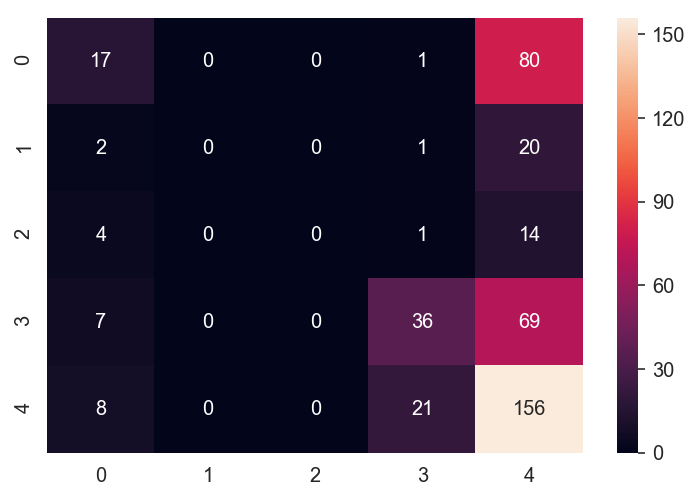

In [75]:
y= all_job_clean.job_classname.values
lr =  LogisticRegression(random_state=48)
lr = lr.fit(X_train,y_train)
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

('Accuracy is: ', 0.48741418764302058)


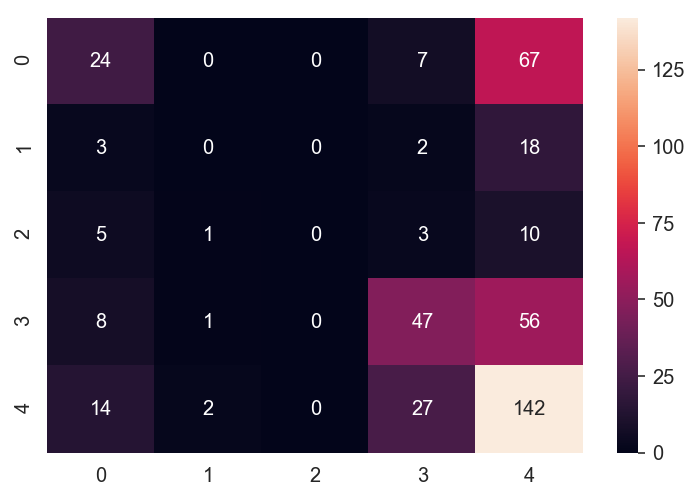

In [76]:
y= all_job_clean.job_classname.values
lr =  GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=4,n_jobs=-1)
lr = lr.fit(X_train,y_train)
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

('Accuracy is: ', 0.4805491990846682)


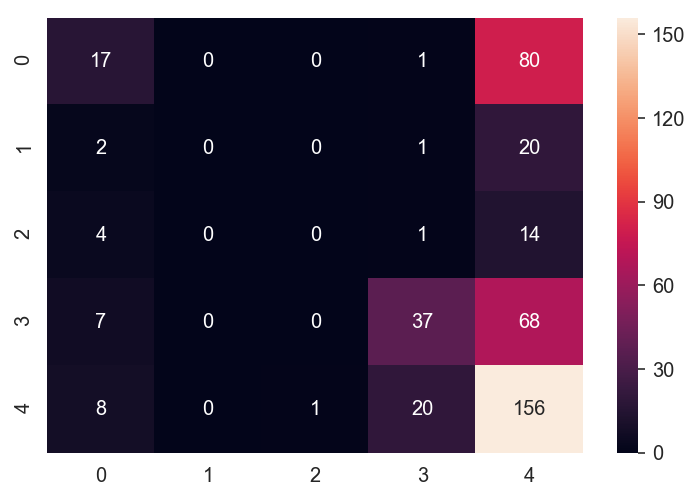

In [77]:
y= all_job_clean.job_classname.values
c_space = np.logspace(-5, 8, 15)
lr =  GridSearchCV(LogisticRegression(random_state=48) ,param_grid={'C': c_space},cv=4)
lr = lr.fit(X_train,y_train)
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

('Accuracy is: ', 0.48283752860411899)


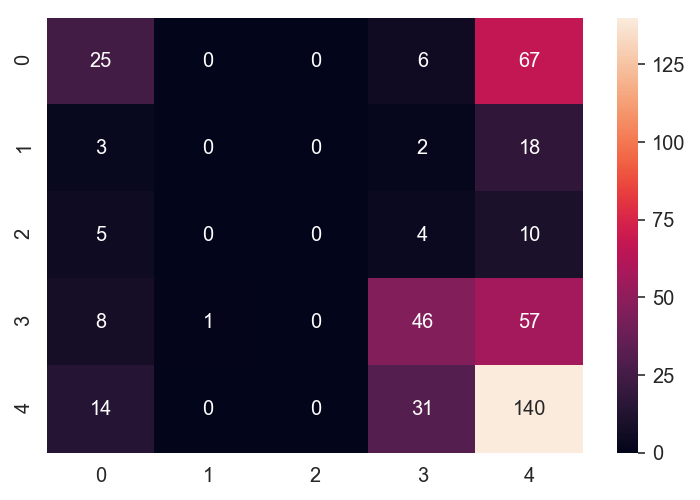

In [78]:
y= all_job_clean.job_classname.values
lr =  GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [10, 40, 80],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]},scoring='accuracy',cv=4,n_jobs=-1)
lr = lr.fit(X_train,y_train)
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

<a id='Q3.4bestmodels'></a>
#### Q 3.5  best models

<a id='GridSearchCVBaggingClassifier'></a>
## GridSearchCV BaggingClassifier

('Accuracy is: ', 0.5011441647597255)


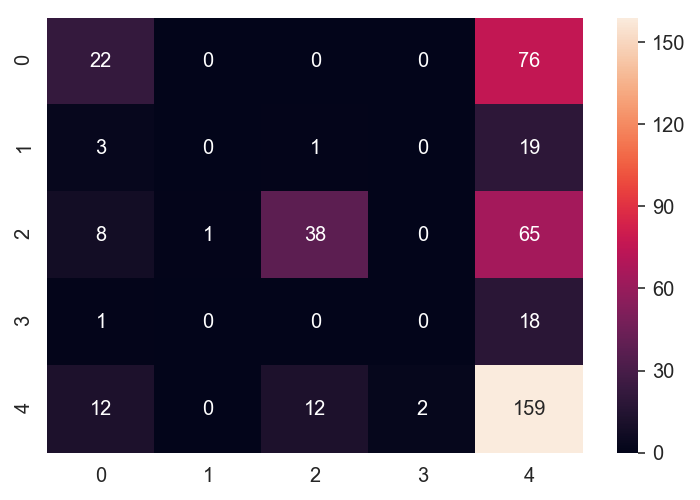

In [293]:
y= all_job_clean.job_classname.values
lr =  GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=4,n_jobs=-1)
lr = lr.fit(X_train,y_train)
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [80]:
model = GridSearchCV(estimator=BaggingClassifier(),param_grid={'n_estimators': [20, 48]},scoring='accuracy',cv=4,n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

BusinessAnalyst       0.42      0.16      0.24        98
    DataAnalyst       0.00      0.00      0.00        23
  DataScientist       0.00      0.00      0.00        19
      Developer       0.54      0.39      0.46       112
       Engineer       0.47      0.80      0.59       185

    avg / total       0.43      0.48      0.42       437



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [294]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train);
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_test.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances[:-21]:
    print('importance: {:22} Importance: {}'.format(*pair))

importance: skill_JavaScript       Importance: 0.11
importance: skill_excel            Importance: 0.1
importance: skill_git              Importance: 0.08
importance: skill_PHP              Importance: 0.05
importance: skill_Cisco            Importance: 0.05
importance: State_Victoria         Importance: 0.05
importance: State_New_South_Wales  Importance: 0.05
importance: skill_UNIX             Importance: 0.04
importance: skill_Oracle           Importance: 0.04
importance: skill_Lambda           Importance: 0.04
importance: State_Western_Australia Importance: 0.04
importance: skill_PostgreSQL       Importance: 0.03
importance: skill_Shell_Scripting  Importance: 0.03
importance: State_Queensland       Importance: 0.03
importance: State_Australian_Capital_Territory Importance: 0.03
importance: skill_tableau          Importance: 0.02
importance: skill_aws              Importance: 0.02


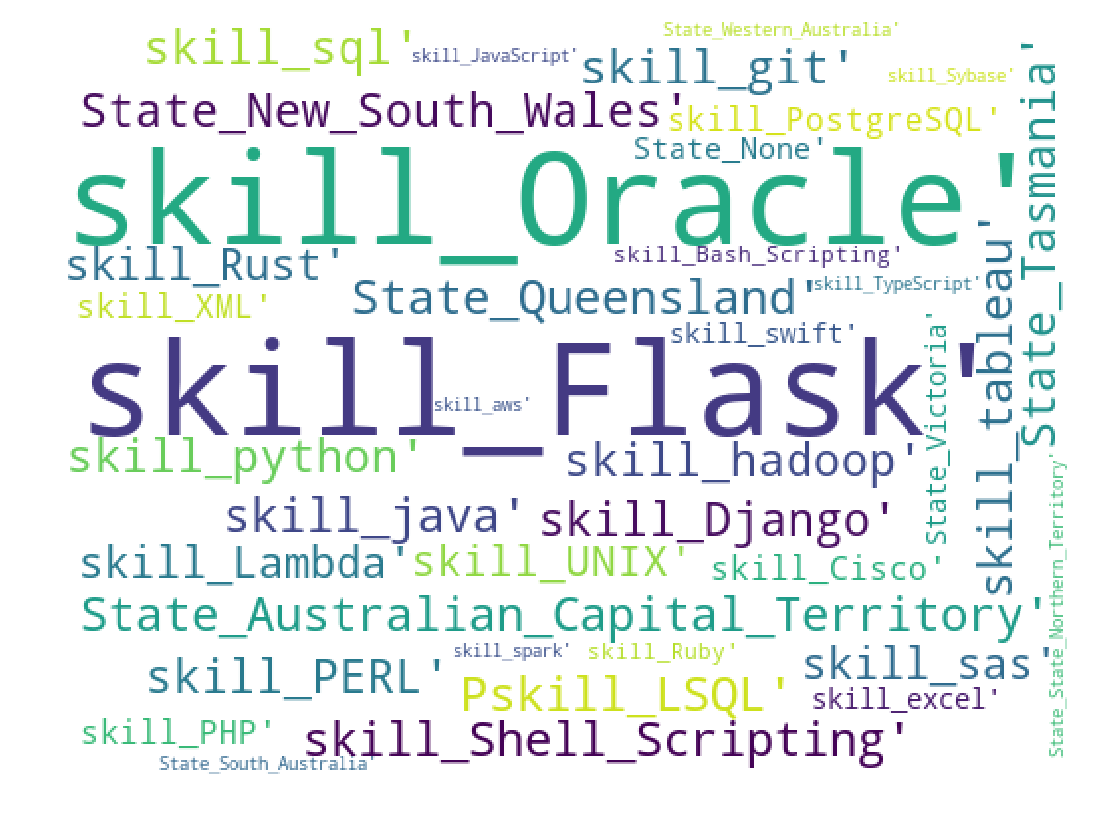

In [295]:
cn = feature_importances
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384 
                     ).generate(" ".join(str(c) for c in cn))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
##try

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=1,train_size=0.7, stratify=y)